## Set up

#### Import Libraries

In [1]:
from utils import *

In [2]:
# TO DO: check if lines 8-11 are needed 

RANDOM_SEED = 6
np.random.seed(RANDOM_SEED)

# torch.backends.cudnn.benchmark = False # uses deterministic convolution algorithm (may reduce performance)
# torch.backends.cudnn.deterministic = True #

#Sets the seed of RNG (GPU and CPU)
torch.manual_seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

torch.cuda.manual_seed_all(RANDOM_SEED)
torch.cuda.manual_seed(RANDOM_SEED) 

In [3]:
# Set settings
features, input_window, output_window, stride = set_settings()

print(f'features: {features}')
print(f'input_window: {input_window}')
print(f'output_window: {output_window}')
print(f'stride: {stride}')

features: ['Hips Flexion-Extension Left', 'Knees Flexion-Extension Left', 'Ankles Dorsiflexion-Plantarflexion Left', 'Hips Flexion-Extension Right', 'Knees Flexion-Extension Right', 'Ankles Dorsiflexion-Plantarflexion Right']
input_window: 100
output_window: 1
stride: 1


In [4]:
# Set device
print(f'The device used in this notebook is: {setDevice()}')

DEVICE = setDevice()

The device used in this notebook is: cuda


#### Load Data 

In [5]:
file_dir = r'D:\Study 2 Data\Healthy Gait\Train'
train_files = os.listdir(file_dir) 

# Changes the working directory to get the data from their location 
os.chdir(file_dir)
cwd = os.getcwd()

print(f'Current working directory is: {cwd}')
print(f"There are {len(train_files)} files in the specified path.")

Current working directory is: D:\Study 2 Data\Healthy Gait\Train
There are 7 files in the specified path.


In [6]:
train_files

['AB3154 BF T6-10.csv',
 'AB6751 BF T1-5.csv',
 'AB7422 BF T1-5.csv',
 'AB7779 BF T1-5.csv',
 'AB9119 BF T1-5.csv',
 'AB9737 BF T1-5.csv',
 'AB9737 BF T6-10.csv']

In [7]:
#Create feature list to extract values needed from CSV files
all_features = ['Trial', 'Time'] + features
all_features

['Trial',
 'Time',
 'Hips Flexion-Extension Left',
 'Knees Flexion-Extension Left',
 'Ankles Dorsiflexion-Plantarflexion Left',
 'Hips Flexion-Extension Right',
 'Knees Flexion-Extension Right',
 'Ankles Dorsiflexion-Plantarflexion Right']

#### Extract Data from CSV into Pandas Dataframe

In [8]:
all_data = create_dataframe(train_files, all_features)

Extracting data from: AB3154 BF T6-10.csv
Extracting data from: AB6751 BF T1-5.csv
Extracting data from: AB7422 BF T1-5.csv
Extracting data from: AB7779 BF T1-5.csv
Extracting data from: AB9119 BF T1-5.csv
Extracting data from: AB9737 BF T1-5.csv
Extracting data from: AB9737 BF T6-10.csv


In [9]:
all_data.reset_index(drop=True, inplace=True) #reset the index of the table
# path = r'D:\Study 2 Data\Healthy Gait' + '\\' + 'all_data_healthy_train.csv'
# all_data.to_csv(path)

In [10]:
all_data

,Patient ID,Trial,Time,Hips Flexion-Extension Left,Knees Flexion-Extension Left,Ankles Dorsiflexion-Plantarflexion Left,Hips Flexion-Extension Right,Knees Flexion-Extension Right,Ankles Dorsiflexion-Plantarflexion Right
0,AB3154 BF T6-10,1,161.00,-1.76414,0.42597,2.24148,-1.29770,4.85581,4.25152
1,AB3154 BF T6-10,1,161.01,-1.71541,0.43044,2.25861,-1.13917,4.97912,4.25320
2,AB3154 BF T6-10,1,161.02,-1.66432,0.43358,2.27493,-0.96327,5.11719,4.25485
3,AB3154 BF T6-10,1,161.03,-1.60888,0.43609,2.29088,-0.77092,5.26771,4.25494
4,AB3154 BF T6-10,1,161.04,-1.54643,0.43905,2.30714,-0.56356,5.42747,4.25163
...,...,...,...,...,...,...,...,...,...
69453,AB9737 BF T6-10,14,474.70,5.59699,13.43638,-0.19627,-10.90823,6.82313,14.37402
69454,AB9737 BF T6-10,14,474.71,5.45820,13.20250,-0.17039,-10.20259,7.80148,14.11679
69455,AB9737 BF T6-10,14,474.72,5.31928,12.95930,-0.15604,-9.44410,8.89409,13.85472
69456,AB9737 BF T6-10,14,474.73,5.17878,12.70795,-0.15333,-8.64847,10.08021,13.59274


In [11]:
n_trials = all_data['Trial'].max()
print(f'maximum number of trials is: {n_trials}')

maximum number of trials is: 16


In [12]:
all_data['Patient ID'].unique()

array(['AB3154 BF T6-10', 'AB6751 BF T1-5', 'AB7422 BF T1-5',
       'AB7779 BF T1-5', 'AB9119 BF T1-5', 'AB9737 BF T1-5',
       'AB9737 BF T6-10'], dtype=object)

#### Divide into training and validation sets

In [13]:
train_subjects = ['AB3154 BF T6-10', 
                     'AB6751 BF T1-5', 
                     'AB7779 BF T1-5',
                     'AB9737 BF T1-5', 
                     'AB9737 BF T6-10',
                     'AB7422 BF T1-5',
                     ]

val_subjects = ['AB9119 BF T1-5']

In [14]:
train_data = all_data.loc[all_data['Patient ID'].isin(train_subjects)]

val_data = all_data.loc[all_data['Patient ID'].isin(val_subjects)]

In [15]:
print(f'all_data: {all_data.shape}')
print(f'train_data: {train_data.shape}')
print(f'val_data: {val_data.shape}')

all_data: (69458, 9)
train_data: (61289, 9)
val_data: (8169, 9)


## Data Analysis

#### Data Analysis

In [16]:
all_data.isnull().sum()

Patient ID                                  0
Trial                                       0
Time                                        0
Hips Flexion-Extension Left                 0
Knees Flexion-Extension Left                0
Ankles Dorsiflexion-Plantarflexion Left     0
Hips Flexion-Extension Right                0
Knees Flexion-Extension Right               0
Ankles Dorsiflexion-Plantarflexion Right    0
dtype: int64

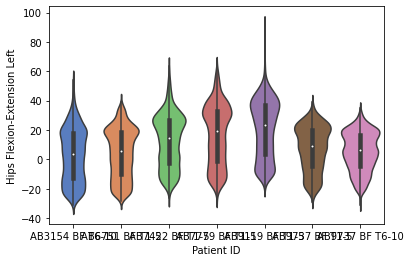

In [17]:
ax = sns.violinplot(x="Patient ID", y="Hips Flexion-Extension Left", 
                    data=all_data, palette="muted")

In [18]:
# ax = sns.violinplot(x="Trial", y="Hips Flexion-Extension Right", 
#                     data=all_data[all_data['Patient ID'] == "AB3154 T6-10 BF"], palette="muted")

In [19]:
# ax = sns.violinplot(x="Trial", y="Hips Flexion-Extension Right", 
#                     data=all_data[all_data['Patient ID'] == "AB5498 BF T6-10"], palette="muted")

## Data Processing

In [20]:
train_samples = count_nsamples(train_data)
val_samples = count_nsamples(val_data)

For patient: AB3154 BF T6-10, trial: 1, there are: 651 time-points
For patient: AB3154 BF T6-10, trial: 2, there are: 541 time-points
For patient: AB3154 BF T6-10, trial: 3, there are: 613 time-points
For patient: AB3154 BF T6-10, trial: 4, there are: 601 time-points
For patient: AB3154 BF T6-10, trial: 5, there are: 711 time-points
For patient: AB3154 BF T6-10, trial: 6, there are: 651 time-points
For patient: AB3154 BF T6-10, trial: 7, there are: 1031 time-points
For patient: AB3154 BF T6-10, trial: 8, there are: 896 time-points
For patient: AB3154 BF T6-10, trial: 9, there are: 812 time-points
For patient: AB6751 BF T1-5, trial: 1, there are: 761 time-points
For patient: AB6751 BF T1-5, trial: 2, there are: 733 time-points
For patient: AB6751 BF T1-5, trial: 3, there are: 731 time-points
For patient: AB6751 BF T1-5, trial: 4, there are: 682 time-points
For patient: AB6751 BF T1-5, trial: 5, there are: 710 time-points
For patient: AB6751 BF T1-5, trial: 6, there are: 708 time-points


In [21]:
print(f'Number of train samples: {train_samples}')
print(f'Number of validation samples: {val_samples}')

Number of train samples: 69
Number of validation samples: 10


In [22]:
# all_data['Patient ID'] == "AB5498 BF T6-10" 

In [23]:
# os.makedirs('D:\Study 2 Data\Pre-process sample', exist_ok=True)  #check if directory exists
# all_data.to_csv('D:\Study 2 Data\Pre-process sample/exported-data3.csv')  #export data to csv

#### Convert Data into numpy array for forming windows

In [24]:
m = all_data['Patient ID'].unique()

In [25]:

def pd_to_np_converter(data, n_samples, features):
    #create a numpy array that stores the data for export
    sample_ID = []
    # patients = 2
    # n_trials = 10
    # # samples = patients * n_trials
    data_store = np.zeros((n_samples, 2000, len(features)), dtype=np.float32)
    i = 0

    for p in data['Patient ID'].unique(): #loop over patients 
        for t in data['Trial'].unique(): #loop over trials starting with trials 1 to trial 9 (inclusive)
            pd_array = data[(data['Patient ID'] == p) & (data['Trial'] == t)]
            if pd_array.empty:
                continue
                # print('DataFrame is empty!')
                # print(f'Trail {t} does not exist in {p}')
            else:
                np_array = pd_array.to_numpy()
                data_store[i, :np_array.shape[0], :] = np_array[:,3:] 
                sample_ID.append(p+ ' Ts'+str(t)) 
                i +=1

    return pd_array.columns, data_store


In [26]:
train_columns, train_data_np = pd_to_np_converter(train_data, train_samples, features)
val_columns, val_data_np = pd_to_np_converter(val_data, val_samples, features)

print(f'train_data_np.shape: {train_data_np.shape}')
print(f'val_data_np.shape: {val_data_np.shape}')

train_data_np.shape: (69, 2000, 6)
val_data_np.shape: (10, 2000, 6)


In [27]:
train_columns[3:].tolist() 

['Hips Flexion-Extension Left',
 'Knees Flexion-Extension Left',
 'Ankles Dorsiflexion-Plantarflexion Left',
 'Hips Flexion-Extension Right',
 'Knees Flexion-Extension Right',
 'Ankles Dorsiflexion-Plantarflexion Right']

In [28]:
features == train_columns[3:].tolist() 

True

In [29]:
labels_keys = train_columns[3:].tolist() #copy the train columns removing the first column headers'Patient ID', 'Trial', 'Time'


if features == labels_keys: # check that the features are the same as the label keys 
    print('YAY! Column headers of dataframe match features')
else:
    print('ERROR: Features and labels_keys do not match!')

YAY! Column headers of dataframe match features


#### Generate Dictionary for Features

In [30]:
labels_keys = features 

labels_idx = np.arange(0, len(labels_keys), 1)

labels = dict(zip(labels_keys, labels_idx))

len(labels)
labels
# labels_keys

{'Hips Flexion-Extension Left': 0,
 'Knees Flexion-Extension Left': 1,
 'Ankles Dorsiflexion-Plantarflexion Left': 2,
 'Hips Flexion-Extension Right': 3,
 'Knees Flexion-Extension Right': 4,
 'Ankles Dorsiflexion-Plantarflexion Right': 5}

#### Process Data: Window Generation

In [31]:
def window_generator_nth(sequence, input_window, output_window, stride, features, labels):
    """
    Trims the input sequence from leading and trailing zeros, then generates an array with input windows and another array for the corresponding output windows
    Args:
        sequence: (np.array, float32) columns are features while rows are time points
        features: (list, strin~g) column names
        input_window: (int)
        stride (int): the value the input window shifts along the sequence 
    Returns:

    """
    # shortest_seqLen = float('inf')

    # f_zeros = [] #array that stores the number of leading zeros for each feature
    b_zeros = [] #array that stores the number of trailing zeros for each feacture 

    for f in features:
        # trim the leading and training zeros
        # f_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'f').shape[0]) #forward zeros
        b_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'b').shape[0]) #backward zeros

    # max_f_zeros = max(f_zeros) #find the maximum number of leading zeros
    max_b_zeros = max(b_zeros) #find the maximum number of trailing/backward zeros 
    # print(max_b_zeros)

    #total sequence length minus max leading and trailing zeros 
    trimmed_seqLen = sequence[:,0].shape[0] - (max_b_zeros)    
    print(f'trimmed_seqLen: {trimmed_seqLen}')

    # Slides are the number of times the input window can scan the sequence 
    # Using the equation that calculates the number of outputs as in convolution  (W – F + 2P) / S + 1, W=input image width, F=filter width, P=padding, S=stride
    # The width of the image is taken as the number of time steps in the sequence, corresponding to the length of any TRIMMED column in the data 
    slides = ((trimmed_seqLen - (input_window+output_window)) // stride) + 1
    print(f"number of slides is: {slides}")

    # Calculating the first index of each of the output sequences (first index always f_zeros as its always shifted to start with the first non-zero element)
    seq_indicies = (np.arange(slides) * stride)

    if slides <= 0:
        raise ValueError("input window and output window length are greater than sequence length, check their values")

    # Creates an zero numpy array to store the samples in 
    X_values = np.zeros((len(seq_indicies) , input_window, len(features)))
    Y_values = np.zeros((len(seq_indicies), 1, len(features)))

    # Loop through the features, then loop through the list of sequence indicies needed for input and output windows 
    for j, feature in enumerate(features):
        # print(j)
        # print(feature)
        for i, idx in enumerate(seq_indicies):
            X_values[i, :, j] = sequence[idx:idx+input_window, labels[feature]]
            Y_values[i, :, j] = sequence[idx+input_window + output_window-1, labels[feature]]
        
    
    print(f'shapeX: {X_values.shape}')
    print(f'shapeY: {Y_values.shape}')

    return X_values, Y_values 


In [39]:
def window_generator_fltrd(sequence, input_window, output_window, stride, features, labels):
    """
    Trims the input sequence from leading and trailing zeros, then generates an array with input windows and another array for the corresponding output windows
    Args:
        sequence: (np.array, float32) columns are features while rows are time points
        features: (list, strin~g) column names
        input_window: (int)
        stride (int): the value the input window shifts along the sequence 
    Returns:

    """
    # shortest_seqLen = float('inf')

    # f_zeros = [] #array that stores the number of leading zeros for each feature
    b_zeros = [] #array that stores the number of trailing zeros for each feacture 

    for f in features:
        # trim the leading and training zeros
        # f_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'f').shape[0]) #forward zeros
        b_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'b').shape[0]) #backward zeros

    # max_f_zeros = max(f_zeros) #find the maximum number of leading zeros
    max_b_zeros = max(b_zeros) #find the maximum number of trailing/backward zeros 
    # print(max_b_zeros)

    #total sequence length minus max leading and trailing zeros 
    trimmed_seqLen = sequence[:,0].shape[0] - (max_b_zeros)
    trimmed_seqLen_reduced = trimmed_seqLen - 200 #reducing sequence size to remove the first and last 200 timesteps which may contain errors   
    print(f'trimmed_seqLen: {trimmed_seqLen}')
    print(f'trimmed_seqLen_reduced: {trimmed_seqLen_reduced}')


    # Slides are the number of times the input window can scan the sequence 
    # Using the equation that calculates the number of outputs as in convolution  (W – F + 2P) / S + 1, W=input image width, F=filter width, P=padding, S=stride
    # The width of the image is taken as the number of time steps in the sequence, corresponding to the length of any TRIMMED column in the data 
    slides = ((trimmed_seqLen_reduced - (input_window+output_window)) // stride) + 1
    print(f"number of slides is: {slides}")

    # Calculating the first index of each of the output sequences (first index always f_zeros as its always shifted to start with the first non-zero element)
    seq_indicies = (np.arange(slides) * stride) + 100

    if slides <= 0:
        raise ValueError("input window and output window length are greater than sequence length, check their values")

    # Creates an zero numpy array to store the samples in 
    X_values = np.zeros((len(seq_indicies) , input_window, len(features)))
    Y_values = np.zeros((len(seq_indicies), output_window, len(features)))

    # Loop through the features, then loop through the list of sequence indicies needed for input and output windows 
    for j, feature in enumerate(features):
        # print(j)
        # print(feature)
        for i, idx in enumerate(seq_indicies):
            X_values[i, :, j] = sequence[idx:idx+input_window, labels[feature]]
            Y_values[i, :, j] = sequence[idx+input_window:idx+input_window + output_window, labels[feature]]

    return X_values, Y_values 

In [40]:
# #Testing window method
# sequence=train_data_np[2, :30,:]
# # f_zeros = [] #array that stores the number of leading zeros for each feature
# b_zeros = [] #array that stores the number of trailing zeros for each feacture 

# for f in features:
#     # trim the leading and training zeros
#     # f_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'f').shape[0]) #forward zeros
#     b_zeros.append(sequence[:,labels[f]].shape[0] - np.trim_zeros(sequence[:,labels[f]], 'b').shape[0]) #backward zeros

# # max_f_zeros = max(f_zeros) #find the maximum number of leading zeros
# max_b_zeros = max(b_zeros) #find the maximum number of trailing/backward zeros 
# # print(max_b_zeros)

# #total sequence length minus max leading and trailing zeros 
# trimmed_seqLen = sequence[:,0].shape[0] - (max_b_zeros)    
# print(f'trimmed_seqLen: {trimmed_seqLen}')

# # Slides are the number of times the input window can scan the sequence 
# # Using the equation that calculates the number of outputs as in convolution  (W – F + 2P) / S + 1, W=input image width, F=filter width, P=padding, S=stride
# # The width of the image is taken as the number of time steps in the sequence, corresponding to the length of any TRIMMED column in the data 
# slides = ((trimmed_seqLen - (input_window+output_window)) // stride) + 1
# print(f"number of slides is: {slides}")

# # Calculating the first index of each of the output sequences (first index always f_zeros as its always shifted to start with the first non-zero element)
# seq_indicies = (np.arange(slides) * stride)

# if slides <= 0:
#     raise ValueError("input window and output window length are greater than sequence length, check their values")

# # Creates an zero numpy array to store the samples in 
# X_values = np.zeros((len(seq_indicies) , input_window, len(features)))
# Y_values = np.zeros((len(seq_indicies), 1, len(features)))
# Yt_values = np.zeros((len(seq_indicies), output_window, len(features)))


# # Loop through the features, then loop through the list of sequence indicies needed for input and output windows 
# for j, feature in enumerate(features):
#     # print(j)
#     # print(feature)
#     for i, idx in enumerate(seq_indicies):
#         X_values[i, :, j] = sequence[idx:idx+input_window, labels[feature]]
#         Yt_values[i, :, j] = sequence[idx+input_window:idx+input_window + output_window, labels[feature]]

#         Y_values[i, :, j] = sequence[idx+input_window + output_window -1, labels[feature]] #just get the nth index (:5 means up to 5 and not inclusive)
#         # print(idx+input_window + output_window)
#         # Y_values[i, :, j] = sequence[idx+input_window + output_window, labels[feature]]


# sequence

# print('X_values')
# print(X_values[2,:,4])

# print('Y_values')
# print(Y_values[2,:,4])

# print('Yt_values')
# print(Yt_values[2,:,4])

In [41]:
# Creating training datasets
# Selecting the features to be used when creating windows 
approx_seq_len = 2000 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file =900


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_train_windows = np.zeros((samples_per_file*train_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_train_windows = np.zeros((samples_per_file*train_samples, 1, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
train_sample_sum = 0
train_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(train_samples): 
       
    X_values, Y_values = window_generator_fltrd(
        train_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_train_windows[start_idx:end_idx, :, :] = X_values
    Y_train_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    train_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_train_data = X_train_windows[:end_idx, :, :]
Y_train_data = Y_train_windows[:end_idx, :, :]


print(f'shape of X_train_windows: {X_train_windows.shape}')
print(f'shape of Y_train_windows: {Y_train_windows.shape}')

print(f'shape of X_train_data: {X_train_data.shape}')
print(f'shape of Y_train_data: {Y_train_data.shape}')

trimmed_seqLen: 651
trimmed_seqLen_reduced: 451
number of slides is: 351
trimmed_seqLen: 541
trimmed_seqLen_reduced: 341
number of slides is: 241
trimmed_seqLen: 613
trimmed_seqLen_reduced: 413
number of slides is: 313
trimmed_seqLen: 601
trimmed_seqLen_reduced: 401
number of slides is: 301
trimmed_seqLen: 711
trimmed_seqLen_reduced: 511
number of slides is: 411
trimmed_seqLen: 651
trimmed_seqLen_reduced: 451
number of slides is: 351
trimmed_seqLen: 1031
trimmed_seqLen_reduced: 831
number of slides is: 731
trimmed_seqLen: 896
trimmed_seqLen_reduced: 696
number of slides is: 596
trimmed_seqLen: 812
trimmed_seqLen_reduced: 612
number of slides is: 512
trimmed_seqLen: 761
trimmed_seqLen_reduced: 561
number of slides is: 461
trimmed_seqLen: 733
trimmed_seqLen_reduced: 533
number of slides is: 433
trimmed_seqLen: 731
trimmed_seqLen_reduced: 531
number of slides is: 431
trimmed_seqLen: 682
trimmed_seqLen_reduced: 482
number of slides is: 382
trimmed_seqLen: 710
trimmed_seqLen_reduced: 510
nu

In [42]:
# Creating validation datasets
# Selecting the features to be used when creating windows 
approx_seq_len = 2000 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 900


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_val_windows = np.zeros((samples_per_file*val_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_val_windows = np.zeros((samples_per_file*val_samples, 1, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
val_sample_sum = 0
val_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(val_samples): 
       
    X_values, Y_values = window_generator_fltrd(
        val_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_val_windows[start_idx:end_idx, :, :] = X_values
    Y_val_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    val_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_val_data = X_val_windows[:end_idx, :, :]
Y_val_data = Y_val_windows[:end_idx, :, :]


print(f'shape of X_val_windows: {X_val_windows.shape}')
print(f'shape of Y_val_windows: {Y_val_windows.shape}')

print(f'shape of X_val_data: {X_val_data.shape}')
print(f'shape of Y_val_data: {Y_val_data.shape}')

trimmed_seqLen: 890
trimmed_seqLen_reduced: 690
number of slides is: 590
trimmed_seqLen: 1001
trimmed_seqLen_reduced: 801
number of slides is: 701
trimmed_seqLen: 831
trimmed_seqLen_reduced: 631
number of slides is: 531
trimmed_seqLen: 1051
trimmed_seqLen_reduced: 851
number of slides is: 751
trimmed_seqLen: 736
trimmed_seqLen_reduced: 536
number of slides is: 436
trimmed_seqLen: 766
trimmed_seqLen_reduced: 566
number of slides is: 466
trimmed_seqLen: 664
trimmed_seqLen_reduced: 464
number of slides is: 364
trimmed_seqLen: 764
trimmed_seqLen_reduced: 564
number of slides is: 464
trimmed_seqLen: 711
trimmed_seqLen_reduced: 511
number of slides is: 411
trimmed_seqLen: 755
trimmed_seqLen_reduced: 555
number of slides is: 455
shape of X_val_windows: (9000, 100, 6)
shape of Y_val_windows: (9000, 1, 6)
shape of X_val_data: (5169, 100, 6)
shape of Y_val_data: (5169, 1, 6)


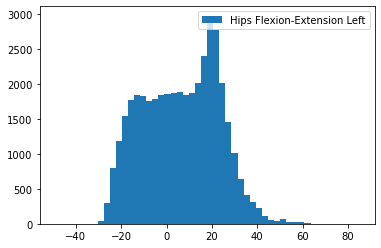

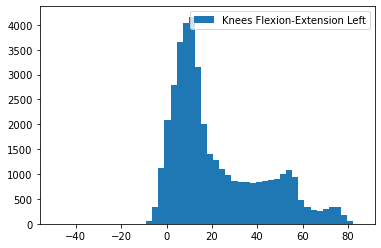

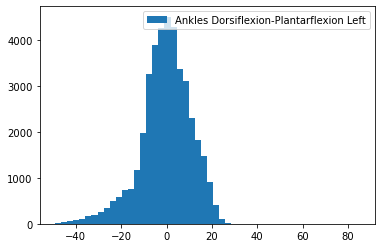

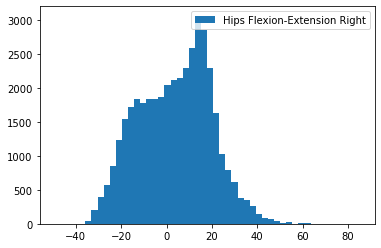

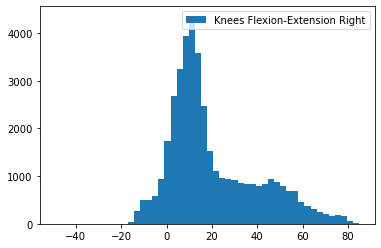

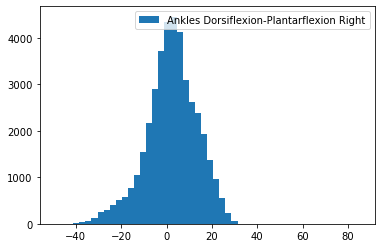

In [43]:
# Plot histogram of the data 
for f in range(len(features)):
    plt.hist(Y_train_data[:,:,f].reshape(-1,1), label = features[f], bins=50, range=(Y_train_data.min(), Y_train_data.max()))
    plt.legend()
    plt.show()

#### Process Data: Normalisation/Standarisation

In [44]:
X_train_norm, scalars = normalise_fit(X_train_data)
Y_train_norm = normalise_transform(Y_train_data, scalars)


X_val_norm = normalise_transform(X_val_data, scalars)
Y_val_norm = normalise_transform(Y_val_data, scalars)


scalars

array([[-30.96504974, -10.40592957, -49.7908783 , -34.75827026,
        -15.14066029, -47.07204819],
       [ 63.01054001,  87.99124146,  27.9573307 ,  61.78282166,
         85.05821228,  31.47718048]])

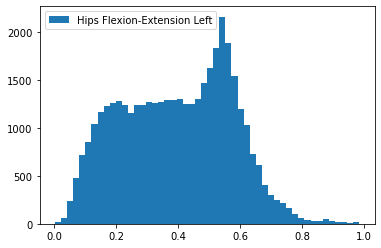

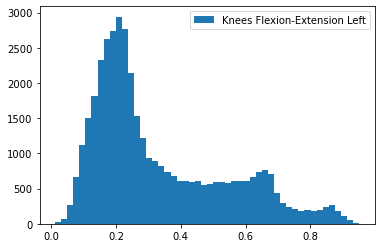

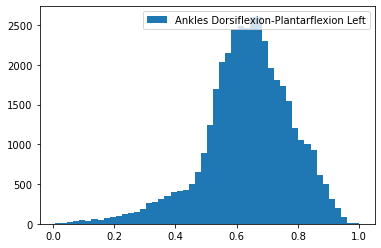

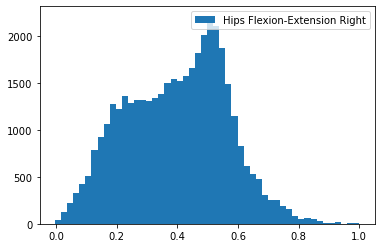

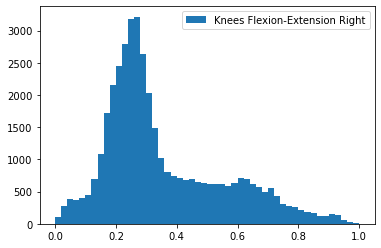

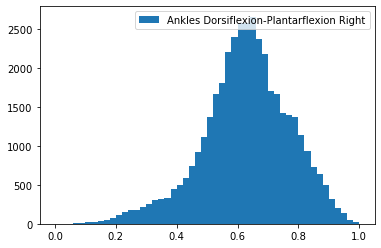

In [45]:
# Plot histogram of the data 
for f in range(len(features)):
    plt.hist(Y_train_norm[:,:,f].reshape(-1,1), bins=50, label = features[f])
    plt.legend()
    plt.show()

In [46]:
# Creates dataset object that gets individual samples for training/testing so that the Dataloader can generate batches
class gaitDataset(Dataset):
    def __init__(self, x, y):
        self.x = x 
        self.y = y 

    def __len__(self):
        return self.x.shape[0]
    
    def __getitem__(self, index):
        X_sample = self.x[index, :, :]
        Y_sample = self.y[index, :]
        return X_sample, Y_sample

In [47]:
# Convert to Tensor 
# do not store on GPU (yet)
X_train = torch.from_numpy(X_train_norm).float()
Y_train = torch.from_numpy(Y_train_norm).float().squeeze()

X_val = torch.from_numpy(X_val_norm).float()
Y_val = torch.from_numpy(Y_val_norm).float().squeeze()

print(f'X_train shape: {X_train.shape}')
print(f'Y_train shape: {Y_train.shape}')

print(f'X_val shape: {X_val.shape}')
print(f'Y_val shape: {Y_val.shape}')


X_train shape: torch.Size([40589, 100, 6])
Y_train shape: torch.Size([40589, 6])
X_val shape: torch.Size([5169, 100, 6])
Y_val shape: torch.Size([5169, 6])


In [48]:
train_dataset = gaitDataset(X_train, Y_train)
# train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle = False)
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle = True)

val_dataset = gaitDataset(X_val, Y_val) #ADJUSTED
# val_dataloader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True)

# batch_size = 32
print(f"Train Dataset length: {len(train_dataset)}")
print(f"Val Dataset length: {len(val_dataset)}")


Train Dataset length: 40589
Val Dataset length: 5169


## Hyperparameter Optimisation

In [49]:
# # useful resources: https://www.youtube.com/watch?v=8A6TEjG2DNw (LSTM Time Series Prediction Tutorial using PyTorch in Python | Coronavirus Daily Cases Forecasting)
# LSTM model 
class LSTM(nn.Module):
    def __init__(self, input_size, in_seq_len, out_seq_len, output_size, params, device):
        super(LSTM, self).__init__()
        '''
        nn.lstm: 
        input_size = number of features in input, if batch_first = TRUE (batchSize, seq_len, Hin) FEATURES
        hidden_size = number of features in hidden state
        num_layers
        batch_first = if TRUE (batch, seq, Hin) Hin may mean input features
        h_0 = (D * num_layers, batchSize, Hout)
        c_0 = (D * num_layers, batchSize, Hcell)

        output = (batchSize, seq_len, D * Hout) Hout may mean output features, if batch first = TRUE 
        h_0 = (D*num_layers, N, Hout) final state for each element in the batch 
        C_0 = (D*num_layers, N, Hcell) final cell state for each element 

        nn.linear:
        input_size = (N,*, Hin) Hin = input_features (equal to hidden size therefore is arbitrarily set)
        output_size = (N, *, Hout) Hout = output features (equal to output_size passed in to the model) 

        '''
        # Pytorch documentation: 
        # >>> rnn = nn.LSTM(10, 20, 2) features, hidden_size, number of layers 
        # >>> input = torch.randn(5, 3, 10) in_seq_len, batch_size, hidden_size (batch size should not be input to the mode, inferred from the shape of the input and will be the first number if batch_first = TRUE)
        # >>> h0 = torch.randn(2, 3, 20)
        # >>> c0 = torch.randn(2, 3, 20)
        # >>> output, (hn, cn) = rnn(input, (h0, c0))

        self.input_size = input_size
        self.hidden_size = params['hidden_size']
        self.num_layers = params['num_layers']
        self.in_seq_len = in_seq_len
        self.output_size = output_size 
        self.out_seq_len = 1 # make this default
        self.device = device
        
        # nn.LSTM(features, hidden_size, number of layers)
        self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, batch_first = True)

        #nn.fc1
        self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))
        # self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))


    def forward(self, input_data):

        # initialise hidden and cell states after passing through each batch (this is skipped in stateless model)
        h_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device) # input_data.shape[0] is equal to batch size
        c_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device)

        #propagate through LSTM
        lstm_out, (h_out, c_out) = self.lstm(input_data, (h_0, c_0))
        # lsmt_out.shape = (batch_size,seq_length, hidden_size)
        # print('lstm_out[-1][-1]')
        # print(lstm_out[-1][-1])

        # print('h_out[-1][-1]')
        # print(h_out[-1][-1])
        # if lstm_out[-1][-1] == h_out[-1][-1]:
        #     print(lstm_out[-1][-1])
            
        # print(f'lsmt_out: {lstm_out.shape}')
        # print(f'h_out: {h_out.shape}')
        # print(f'h_out: {h_out.shape}')

        # propagate through linear layer 
        fc1_out = self.fc1(h_out[-1])
        # fc1_out = self.fc1(lstm_out)
        # print(f'preds.shape (before reshaping): {fc1_out.shape}')
        
        preds = fc1_out.reshape(input_data.shape[0], self.out_seq_len, self.output_size)
        # print(f'preds.shape (after reshaping): {preds.shape}')
        
        return preds

In [50]:
def train_LSTM(model, train_dataloader, val_dataloader, params, device):
    loss_function = nn.MSELoss(reduction='mean')
    optimiser = torch.optim.Adam(model.parameters(), lr = params['learning_rate'])

    # train_loss, val_loss = np.zeros(num_epochs), np.zeros(num_epochs)
    num_epochs=params['num_epochs']
    train_loss = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    for epoch in range(num_epochs):
        # Loop over batch values 
        runningLoss_train = 0. 

        for idx, (batch_inputs, batch_targets) in enumerate(train_dataloader):
            
            # Save batch on GPU
            batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)

            # Means we are training the model, so uses techniques such as dropout etc., otherwise model.train(model=False)
            model.train() 

            #set gradients to zero
            optimiser.zero_grad()
            preds = model(batch_inputs)
            # print(f'shape of training predictions: {preds.shape}')
        
            loss = loss_function(preds, batch_targets)
            

            loss.backward()
            optimiser.step()
            runningLoss_train += loss.item()

        train_loss[epoch] = runningLoss_train / len(train_dataloader)

        # print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Training loss: {runningLoss_train/len(train_dataloader)}")

        # Evaluate on validation set

        model.eval() # means we are evaluating the model, stops process such as dropout etc. 
        runningLoss_val = 0.

        with torch.no_grad(): # makes sure gradient is not stored 
            for idx, (batch_inputs, batch_targets) in enumerate(val_dataloader):
                
                batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
                optimiser.zero_grad() #WHY?
                preds = model(batch_inputs)
                # print(f'shape of validation predictions: {preds.shape}')

                loss = loss_function(preds, batch_targets)
                runningLoss_val += loss.item()

        val_loss[epoch] = runningLoss_val/len(val_dataloader)

        # print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Validation loss: {runningLoss_val/len(val_dataloader)}")

    return val_loss[-1]

In [51]:
input_size=len(features)
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)

In [52]:
def objective_LSTM(trial):
        
    params = {
            'learning_rate': trial.suggest_categorical('learning_rate', [0.1, 0.01, 0.001, 0.0001, 0.00001]),
            'num_epochs': trial.suggest_int('num_epochs', 10, 250, step=10),
            'num_layers': trial.suggest_categorical('num_layers', [1,2,3,4]),
            'hidden_size': trial.suggest_categorical('hidden_size', [16, 32, 64, 100, 128, 256])
            }
    
    model = LSTM(input_size=input_size, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, params = params, device=DEVICE).to(DEVICE)
    val_loss = train_LSTM(model, train_dataloader, val_dataloader, params, device=DEVICE)


    return val_loss


In [53]:
# import optuna

# study = optuna.create_study(direction="minimize", sampler=optuna.samplers.TPESampler(), pruner=optuna.pruners.HyperbandPruner())
# study.optimize(objective_LSTM, n_trials=100)



## Training Models

#### Deep Learning Models

In [54]:
model = 'LSTM'
exp_ID = '095'

In [55]:
MODEL_PATH =   r'D:\Study 2 Results and Models\Study 2 Model Checkpoints' + '\\'  + 'Exp' + str(exp_ID) + '-' + str(date.today()) + '-' + model + '-In' + str(input_window) + '-Out' + str(output_window) + '.pt'

In [56]:
# Training the LSTM model using a loss function and a optimiser
def train_LSTM(model, train_dataloader, val_dataloader, num_epochs, learning_rate, device):
    loss_function = nn.MSELoss(reduction='mean')
    optimiser = torch.optim.Adam(model.parameters(), lr = learning_rate)

    # train_loss, val_loss = np.zeros(num_epochs), np.zeros(num_epochs)
    train_loss = np.zeros(num_epochs)
    val_loss = np.zeros(num_epochs)

    min_val_loss = 1.

    for epoch in tqdm(range(num_epochs)):
        # Loop over batch values 
        runningLoss_train = 0. 

        for idx, (batch_inputs, batch_targets) in enumerate(train_dataloader):
            
            # Save batch on GPU
            batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)

            # Means we are training the model, so uses techniques such as dropout etc., otherwise model.train(model=False)
            model.train() 

            #set gradients to zero
            optimiser.zero_grad()
            preds = model(batch_inputs)
            # print(f'shape of training predictions: {preds.shape}')
        
            loss = loss_function(preds, batch_targets)
            

            loss.backward()
            optimiser.step()
            runningLoss_train += loss.item()

        train_loss[epoch] = runningLoss_train / len(train_dataloader)

        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Training loss: {runningLoss_train/len(train_dataloader)}")

        # Evaluate on validation set

        model.eval() # means we are evaluating the model, stops process such as dropout etc. 
        runningLoss_val = 0.

        with torch.no_grad(): # makes sure gradient is not stored 
            for idx, (batch_inputs, batch_targets) in enumerate(val_dataloader):
                
                batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)
                optimiser.zero_grad() #WHY?
                preds = model(batch_inputs)
                # print(f'shape of validation predictions: {preds.shape}')

                loss = loss_function(preds, batch_targets)
                runningLoss_val += loss.item()

        val_loss[epoch] = runningLoss_val/len(val_dataloader)


        print(f"Epoch: [{epoch + 1}/{num_epochs}]", f"Validation loss: {runningLoss_val/len(val_dataloader)}")

        # print(f'val loss: {val_loss[epoch]}')

        # print(f'min val loss: {min_val_loss}')
        # Save best model so far
        if val_loss[epoch] < min_val_loss:

            # print('YAY, new best value')
            min_val_loss = val_loss[epoch]

            torch.save({
                        'epoch': epoch,
                        'model_state_dict': model.state_dict(),
                        'optimiser_state_dict': optimiser.state_dict(),
                        'loss': val_loss[epoch],
                        }, MODEL_PATH)
                        

    return train_loss, val_loss

In [57]:
# # useful resources: https://www.youtube.com/watch?v=8A6TEjG2DNw (LSTM Time Series Prediction Tutorial using PyTorch in Python | Coronavirus Daily Cases Forecasting)
# LSTM model 

class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, in_seq_len, out_seq_len, output_size, device):
        super(LSTM, self).__init__()
        '''
        nn.lstm: 
        input_size = number of features in input, if batch_first = TRUE (batchSize, seq_len, Hin) FEATURES
        hidden_size = number of features in hidden state
        num_layers
        batch_first = if TRUE (batch, seq, Hin) Hin may mean input features
        h_0 = (D * num_layers, batchSize, Hout)
        c_0 = (D * num_layers, batchSize, Hcell)

        output = (batchSize, seq_len, D * Hout) Hout may mean output features, if batch first = TRUE 
        h_0 = (D*num_layers, N, Hout) final state for each element in the batch 
        C_0 = (D*num_layers, N, Hcell) final cell state for each element 

        nn.linear:
        input_size = (N,*, Hin) Hin = input_features (equal to hidden size therefore is arbitrarily set)
        output_size = (N, *, Hout) Hout = output features (equal to output_size passed in to the model) 

        '''
        # Pytorch documentation: 
        # >>> rnn = nn.LSTM(10, 20, 2) features, hidden_size, number of layers 
        # >>> input = torch.randn(5, 3, 10) in_seq_len, batch_size, hidden_size (batch size should not be input to the mode, inferred from the shape of the input and will be the first number if batch_first = TRUE)
        # >>> h0 = torch.randn(2, 3, 20)
        # >>> c0 = torch.randn(2, 3, 20)
        # >>> output, (hn, cn) = rnn(input, (h0, c0))

        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.in_seq_len = in_seq_len
        self.output_size = output_size
        self.out_seq_len = 1 #make this default
        self.device = device
        
        # nn.LSTM(features, hidden_size, number of layers)
        self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, dropout=0.1, batch_first = True)

        #nn.fc1
        # self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len)) #ORIGINAL
        self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=self.output_size)


    def forward(self, input_data):

        # initialise hidden and cell states after passing through each batch (this is skipped in stateless model)
        h_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device) # input_data.shape[0] is equal to batch size
        c_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device)

        #propagate through LSTM
        lstm_out, (h_out, c_out) = self.lstm(input_data, (h_0, c_0))
        fc1_out = self.fc1(h_out[-1])
        
        preds = fc1_out
        
        return preds

In [58]:
# # # useful resources: https://www.youtube.com/watch?v=8A6TEjG2DNw (LSTM Time Series Prediction Tutorial using PyTorch in Python | Coronavirus Daily Cases Forecasting)
# # LSTM model 
# class LSTM_attention(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, in_seq_len, out_seq_len, output_size, device):
#         super(LSTM_attention, self).__init__()
#         '''
#         nn.lstm: 
#         input_size = number of features in input, if batch_first = TRUE (batchSize, seq_len, Hin) FEATURES
#         hidden_size = number of features in hidden state
#         num_layers
#         batch_first = if TRUE (batch, seq, Hin) Hin may mean input features
#         h_0 = (D * num_layers, batchSize, Hout)
#         c_0 = (D * num_layers, batchSize, Hcell)

#         output = (batchSize, seq_len, D * Hout) Hout may mean output features, if batch first = TRUE 
#         h_0 = (D*num_layers, N, Hout) final state for each element in the batch 
#         C_0 = (D*num_layers, N, Hcell) final cell state for each element 

#         nn.linear:
#         input_size = (N,*, Hin) Hin = input_features (equal to hidden size therefore is arbitrarily set)
#         output_size = (N, *, Hout) Hout = output features (equal to output_size passed in to the model) 

#         '''
#         # Pytorch documentation: 
#         # >>> rnn = nn.LSTM(10, 20, 2) features, hidden_size, number of layers 
#         # >>> input = torch.randn(5, 3, 10) in_seq_len, batch_size, hidden_size (batch size should not be input to the mode, inferred from the shape of the input and will be the first number if batch_first = TRUE)
#         # >>> h0 = torch.randn(2, 3, 20)
#         # >>> c0 = torch.randn(2, 3, 20)
#         # >>> output, (hn, cn) = rnn(input, (h0, c0))

#         self.input_size = input_size
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.in_seq_len = in_seq_len
#         self.output_size = output_size
#         self.out_seq_len = 1 #make this default
#         self.device = device
        
#         # nn.LSTM(features, hidden_size, number of layers)
#         self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, batch_first = True)

#         self.attention = nn.MultiheadAttention(embed_dim=self.hidden_size, num_heads=4, batch_first=True, device = DEVICE)

#         #nn.fc1
#         self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))
#         # self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))

#     # def attention_net(self, lstm_output, final_state):
#     #         # lstm_output = lstm_output.permute(1, 0, 2)
#     #         hidden = final_state.squeeze(0)
#     #         attn_weights = torch.bmm(lstm_output, hidden.unsqueeze(2)).squeeze(2)
#     #         soft_attn_weights = F.softmax(attn_weights, dim=1)
#     #         new_hidden_state = torch.bmm(lstm_output.transpose(1, 2),
#     #                                     soft_attn_weights.unsqueeze(2)).squeeze(2)
                
#     #         return new_hidden_state

#     def attention(self, lstm_output, final_state):
#         # lstm_output = lstm_output.permute(1, 0, 2)
#         merged_state = torch.cat([s for s in final_state], 1)
#         merged_state = merged_state.squeeze(0).unsqueeze(2)
#         weights = torch.bmm(lstm_output, merged_state)
#         weights = F.softmax(weights.squeeze(2), dim=1).unsqueeze(2)
#         return torch.bmm(torch.transpose(lstm_output, 1, 2), weights).squeeze(2)

#     def forward(self, input_data):

#         # initialise hidden and cell states after passing through each batch (this is skipped in stateless model)
#         h_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device) # input_data.shape[0] is equal to batch size
#         c_0 = torch.zeros(self.num_layers, input_data.shape[0], self.hidden_size).to(self.device)

#         #propagate through LSTM
#         lstm_out, (h_out, c_out) = self.lstm(input_data, (h_0, c_0))
#         # lsmt_out.shape = (batch_size,seq_length, hidden_size)
#         # print('lstm_out[-1][-1]')
#         # print(lstm_out[-1][-1])

#         # print('h_out[-1][-1]')
#         # print(h_out[-1][-1])
#         # if lstm_out[-1][-1] == h_out[-1][-1]:
#         #     print(lstm_out[-1][-1])
            
#         # print(f'lsmt_out: {lstm_out.shape}')
#         # print(f'h_out: {h_out.shape}')
#         # print(f'h_out: {h_out.shape}')    

#         print(f'h_out[-1,:,:] shape: {h_out[-1,:,:].shape}')
#         print(f'h_out[-1] shape: {h_out[-1].shape}')
#         print(f'h_out shape: {h_out.shape}')
#         print(f'lstm_out shape: {lstm_out.shape}')

#         attn_output = self.attention(lstm_out, h_out)

#         print(f'attn_output shape: {attn_output.shape}')
#         # print(f'attn_output_weights shape: {attn_output_weights.shape}')


#         # propagate through linear layer 

#         fc1_out = self.fc1(h_out[-1])
#         # fc1_out = self.fc1(lstm_out)
#         # print(f'preds.shape (before reshaping): {fc1_out.shape}')

        
#         preds = fc1_out.reshape(input_data.shape[0], self.out_seq_len, self.output_size)
#         # print(f'preds.shape (after reshaping): {preds.shape}')
        
#         return preds

In [59]:
# # # useful resources: https://www.youtube.com/watch?v=8A6TEjG2DNw (LSTM Time Series Prediction Tutorial using PyTorch in Python | Coronavirus Daily Cases Forecasting)
# # LSTM model 
# class LSTM_bi(nn.Module):
#     def __init__(self, input_size, hidden_size, num_layers, in_seq_len, out_seq_len, output_size, device):
#         super(LSTM_bi, self).__init__()
#         '''
#         nn.lstm: 
#         input_size = number of features in input, if batch_first = TRUE (batchSize, seq_len, Hin) FEATURES
#         hidden_size = number of features in hidden state
#         num_layers
#         batch_first = if TRUE (batch, seq, Hin) Hin may mean input features
#         h_0 = (D * num_layers, batchSize, Hout)
#         c_0 = (D * num_layers, batchSize, Hcell)

#         output = (batchSize, seq_len, D * Hout) Hout may mean output features, if batch first = TRUE 
#         h_0 = (D*num_layers, N, Hout) final state for each element in the batch 
#         C_0 = (D*num_layers, N, Hcell) final cell state for each element 

#         nn.linear:
#         input_size = (N,*, Hin) Hin = input_features (equal to hidden size therefore is arbitrarily set)
#         output_size = (N, *, Hout) Hout = output features (equal to output_size passed in to the model) 

#         '''
#         # Pytorch documentation: 
#         # >>> rnn = nn.LSTM(10, 20, 2) features, hidden_size, number of layers 
#         # >>> input = torch.randn(5, 3, 10) in_seq_len, batch_size, hidden_size (batch size should not be input to the mode, inferred from the shape of the input and will be the first number if batch_first = TRUE)
#         # >>> h0 = torch.randn(2, 3, 20)
#         # >>> c0 = torch.randn(2, 3, 20)
#         # >>> output, (hn, cn) = rnn(input, (h0, c0))

#         self.input_size = input_size
#         self.hidden_size = hidden_size
#         self.num_layers = num_layers
#         self.in_seq_len = in_seq_len
#         self.output_size = output_size
#         self.out_seq_len = 1
#         self.device = device
        
#         # nn.LSTM(features, hidden_size, number of layers)
#         self.lstm = nn.LSTM(input_size=self.input_size, hidden_size=self.hidden_size, num_layers=self.num_layers, batch_first = True, bidirectional=True)

#         #nn.fc1
#         self.fc1 = nn.Linear(in_features=self.hidden_size*2, out_features=(self.output_size * self.out_seq_len))
#         # self.fc1 = nn.Linear(in_features=self.hidden_size, out_features=(self.output_size * self.out_seq_len))


#     def forward(self, input_data):

#         # initialise hidden and cell states after passing through each batch (this is skipped in stateless model)
#         h_0 = torch.zeros(self.num_layers*2, input_data.shape[0], self.hidden_size).to(self.device) # input_data.shape[0] is equal to batch size
#         c_0 = torch.zeros(self.num_layers*2, input_data.shape[0], self.hidden_size).to(self.device)

#         #propagate through LSTM
#         lstm_out, (h_out, c_out) = self.lstm(input_data, (h_0, c_0))
#         # lsmt_out.shape = (batch_size,seq_length, hidden_size)
#         # print('h_out.shape')
#         # print(h_out.shape)

#         # print('lstm_out[:,-1,:].shape')
#         # print(lstm_out[:,-1,:].shape)

#         # print('h_out[-1]')
#         # print(h_out[-1].shape)
#         # if lstm_out[-1][-1] == h_out[-1][-1]:
#         # #     print(lstm_out[-1][-1])
#         # concat_lstm_out = torch.cat((h_out[0,:,:], h_out[-1,:,:]), dim = 1)
#         # print(f'concat_lstm_out {concat_lstm_out.shape}')
#         # print(f'lsmt_out: {lstm_out[:,-1,:].shape}')
#         # print(f'h_out: {h_out[-1].shape}')
#         # print(f'h_out: {h_out.shape}')

#         # propagate through linear layer 
#         # fc1_out = self.fc1(lstm_out[:,-1,:])

#         # hidden = torch.cat((h_out[-2, :, :], h_out[-1, :, :]),
#         #                                 dim=1)

            
#         # print(f'hidden : {hidden.shape}')
#         # fc1_out = self.fc1(hidden)
#         fc1_out = self.fc1(h_out[-1])
#         # print(f'preds.shape (before reshaping): {fc1_out.shape}')
        
#         preds = fc1_out.reshape(input_data.shape[0], self.out_seq_len, self.output_size)
#         # print(f'preds.shape (after reshaping): {preds.shape}')
        
#         return preds

In [96]:
# # # Train LSTM 
input_size=len(features)
hidden_size=10
num_layers=3
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)
num_epochs=20
learning_rate= 0.001


model_LSTM = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)

train_history, val_history = train_LSTM(model_LSTM, train_dataloader=train_dataloader, val_dataloader=val_dataloader, num_epochs=num_epochs, learning_rate=learning_rate, device=DEVICE) #ADJUSTED

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: [1/20] Training loss: 0.013842355961014565
Epoch: [1/20] Validation loss: 0.009574708672539319
Epoch: [2/20] Training loss: 0.0029754052169464608
Epoch: [2/20] Validation loss: 0.005462128358582656
Epoch: [3/20] Training loss: 0.0019356807333672
Epoch: [3/20] Validation loss: 0.0033719578785189417
Epoch: [4/20] Training loss: 0.0012530077820426095
Epoch: [4/20] Validation loss: 0.0020939132391279676
Epoch: [5/20] Training loss: 0.0008523084634326172
Epoch: [5/20] Validation loss: 0.001648036799900935
Epoch: [6/20] Training loss: 0.0006908187584875898
Epoch: [6/20] Validation loss: 0.0014379472084800472
Epoch: [7/20] Training loss: 0.0006059117288025669
Epoch: [7/20] Validation loss: 0.0012305530223256714
Epoch: [8/20] Training loss: 0.0005459149627277102
Epoch: [8/20] Validation loss: 0.0010733948395311556
Epoch: [9/20] Training loss: 0.0005085429693697036
Epoch: [9/20] Validation loss: 0.001100534986669376
Epoch: [10/20] Training loss: 0.00047811057379718535
Epoch: [10/20] Vali

#### Load best model

In [97]:
checkpoint_model = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
optimiser = torch.optim.Adam(checkpoint_model.parameters(), lr = learning_rate)

checkpoint = torch.load(MODEL_PATH)
checkpoint_model.load_state_dict(checkpoint['model_state_dict'])
optimiser.load_state_dict(checkpoint['optimiser_state_dict'])
best_epoch = checkpoint['epoch']
best_val_loss = checkpoint['loss']

checkpoint_model.eval()


LSTM(
  (lstm): LSTM(6, 10, num_layers=3, batch_first=True, dropout=0.1)
  (fc1): Linear(in_features=10, out_features=6, bias=True)
)

In [98]:
MODEL_PATH

'D:\\Study 2 Results and Models\\Study 2 Model Checkpoints\\Exp095-2022-07-29-LSTM-In100-Out1.pt'

In [99]:
best_epoch

18

In [100]:
best_val_loss

0.000694713918984448

In [101]:
pred_val_output, actual_val_output, val_loss = test_LSTM(checkpoint_model, val_dataloader, DEVICE)

predicted_values_val = pred_val_output.cpu().numpy()
actual_values_val = actual_val_output.cpu().numpy()

print(f'val loss: {val_loss}')
print(f'Shape of predicted values test: {predicted_values_val.shape}')
print(f'shape of actual values test: {actual_values_val.shape}')

predicted_val_denorm = denormalise(np.expand_dims(predicted_values_val,1), scalars)
actual_val_denorm = denormalise(np.expand_dims(actual_values_val,1), scalars)

print(f'Shape of predicted values test post denormalisation: {predicted_val_denorm.shape}')
print(f'shape of actual values test post denormalisation: {actual_val_denorm.shape}')

0it [00:00, ?it/s]

val loss: 0.0006973406324740845
Shape of predicted values test: (5169, 6)
shape of actual values test: (5169, 6)
Shape of predicted values test post denormalisation: (5169, 1, 6)
shape of actual values test post denormalisation: (5169, 1, 6)


In [102]:
val_mse_loss, val_mse_std = mse_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')
val_mae_loss, val_mae_std = mae_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')

print(f'Val MSE Loss: {val_mse_loss}')
print(f'Val MSE std: {val_mse_std}')
print(f'Val MAE Loss: {val_mae_loss}')
print(f'Val MAE std: {val_mae_std}')

Val MSE Loss: 6.0170371646675695
Val MSE std: 17.843278884887695
Val MAE Loss: 1.757118383028632
Val MAE std: 1.7115991115570068


#### Training and validation losses

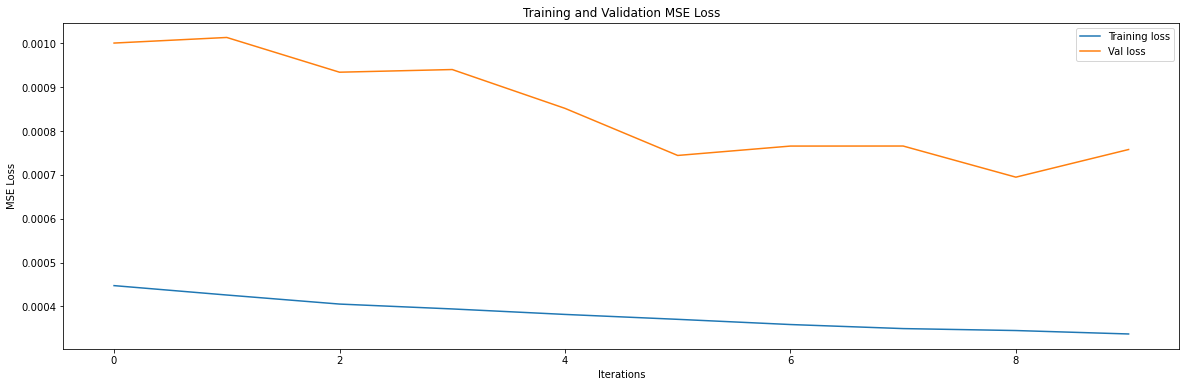

In [103]:
plt.plot(train_history[10:], label = 'Training loss')
plt.plot(val_history[10:], label = 'Val loss')
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Training and Validation MSE Loss')
plt.legend()
plt.show()

#### Load Test Data

In [104]:
file_dir = r'D:\Study 2 Data\Healthy Gait\Val'
# file_dir = f'D:\Study 2 Data\Healthy Gait\evaluate'
test_files = os.listdir(file_dir) 

# Changes the working directory to get the data from their location 
os.chdir(file_dir)
cwd = os.getcwd()

print(f'Current working directory is: {cwd}')
print(f"There are {len(test_files)} files in the specified path.")

test_files


Current working directory is: D:\Study 2 Data\Healthy Gait\Val
There are 1 files in the specified path.


['AB9119 BF T1-5.csv']

In [105]:
val_subjects

['AB9119 BF T1-5']

In [70]:
test_data = create_dataframe(test_files, all_features)

Extracting data from: AB9119 BF T1-5.csv


In [71]:
test_data.shape

(8169, 9)

In [72]:
test_samples = count_nsamples(test_data)

For patient: AB9119 BF T1-5, trial: 1, there are: 890 time-points
For patient: AB9119 BF T1-5, trial: 2, there are: 1001 time-points
For patient: AB9119 BF T1-5, trial: 3, there are: 831 time-points
For patient: AB9119 BF T1-5, trial: 4, there are: 1051 time-points
For patient: AB9119 BF T1-5, trial: 5, there are: 736 time-points
For patient: AB9119 BF T1-5, trial: 6, there are: 766 time-points
For patient: AB9119 BF T1-5, trial: 7, there are: 664 time-points
For patient: AB9119 BF T1-5, trial: 8, there are: 764 time-points
For patient: AB9119 BF T1-5, trial: 9, there are: 711 time-points
For patient: AB9119 BF T1-5, trial: 10, there are: 755 time-points

There are 10 samples


In [73]:
def pd_to_np_converter(data, n_samples, features):
    #create a numpy array that stores the data for export
    sample_ID = []
    # patients = 2
    # n_trials = 10
    # # samples = patients * n_trials
    data_store = np.zeros((n_samples, 2500, len(features)), dtype=np.float32)
    i = 0

    for p in data['Patient ID'].unique(): #loop over patients 
        for t in data['Trial'].unique(): #loop over trials starting with trials 1 to trial 9 (inclusive)
            pd_array = data[(data['Patient ID'] == p) & (data['Trial'] == t)]
            if pd_array.empty:
                continue
                # print('DataFrame is empty!')
                # print(f'Trail {t} does not exist in {p}')
            else:
                np_array = pd_array.to_numpy()
                data_store[i, :np_array.shape[0], :] = np_array[:,3:] #[:,3:] is because we are
                sample_ID.append(p+ ' Ts'+str(t)) 
                i +=1

    return pd_array.columns, data_store

In [74]:
test_columns, test_data_np = pd_to_np_converter(test_data, test_samples, features)

print(f'test_data_np.shape: {test_data_np.shape}')

test_columns

test_data_np.shape: (10, 2500, 6)


Index(['Patient ID', 'Trial', 'Time', 'Hips Flexion-Extension Left',
       'Knees Flexion-Extension Left',
       'Ankles Dorsiflexion-Plantarflexion Left',
       'Hips Flexion-Extension Right', 'Knees Flexion-Extension Right',
       'Ankles Dorsiflexion-Plantarflexion Right'],
      dtype='object')

In [80]:
# Selecting the features to be used when creating windows 
# approx_seq_len = 2500 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 2000


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_test_windows = np.zeros((samples_per_file*test_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_test_windows = np.zeros((samples_per_file*test_samples, output_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
test_sample_sum = 0
test_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(test_samples): 
       
    X_values, Y_values = window_generator_fltrd(
        test_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_test_windows[start_idx:end_idx, :, :] = X_values
    Y_test_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    test_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_test_data = X_test_windows[:end_idx, :, :]
Y_test_data = Y_test_windows[:end_idx, :, :]


print(f'shape of X_test_windows: {X_test_windows.shape}')
print(f'shape of Y_test_windows: {Y_test_windows.shape}')

print(f'shape of X_test_data: {X_test_data.shape}')
print(f'shape of Y_test_data: {Y_test_data.shape}')

trimmed_seqLen: 890
trimmed_seqLen_reduced: 690
number of slides is: 590
trimmed_seqLen: 1001
trimmed_seqLen_reduced: 801
number of slides is: 701
trimmed_seqLen: 831
trimmed_seqLen_reduced: 631
number of slides is: 531
trimmed_seqLen: 1051
trimmed_seqLen_reduced: 851
number of slides is: 751
trimmed_seqLen: 736
trimmed_seqLen_reduced: 536
number of slides is: 436
trimmed_seqLen: 766
trimmed_seqLen_reduced: 566
number of slides is: 466
trimmed_seqLen: 664
trimmed_seqLen_reduced: 464
number of slides is: 364
trimmed_seqLen: 764
trimmed_seqLen_reduced: 564
number of slides is: 464
trimmed_seqLen: 711
trimmed_seqLen_reduced: 511
number of slides is: 411
trimmed_seqLen: 755
trimmed_seqLen_reduced: 555
number of slides is: 455
shape of X_test_windows: (20000, 100, 6)
shape of Y_test_windows: (20000, 1, 6)
shape of X_test_data: (5169, 100, 6)
shape of Y_test_data: (5169, 1, 6)


#### Prepare Data for hModel

In [81]:
hModel_X_test_norm = normalise_transform(X_test_data, scalars)
hModel_Y_test_norm = normalise_transform(Y_test_data, scalars)

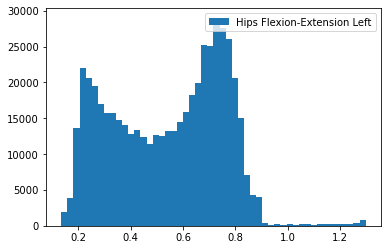

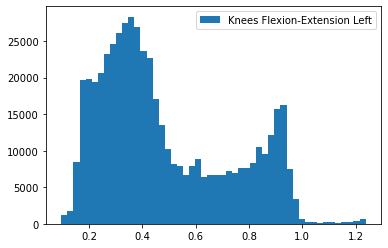

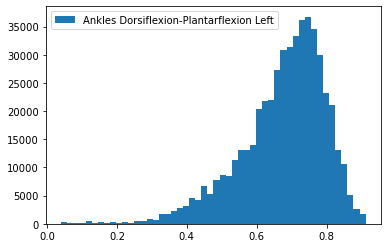

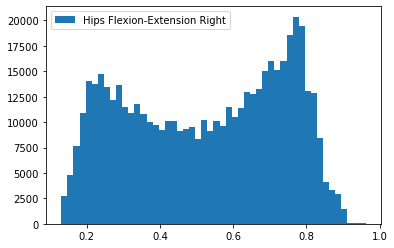

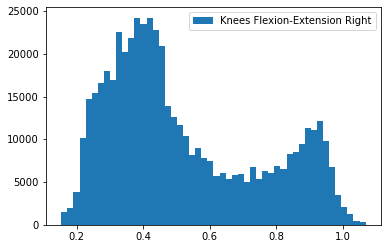

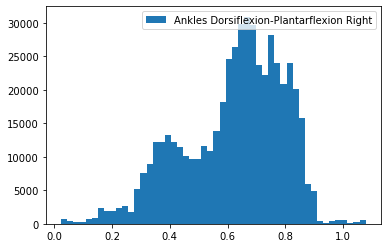

In [82]:
# Plot histogram of the data 
for f in range(len(features)):
    plt.hist(hModel_X_test_norm[:,:,f].reshape(-1,1), bins=50, label = features[f])
    plt.legend()
    plt.show()

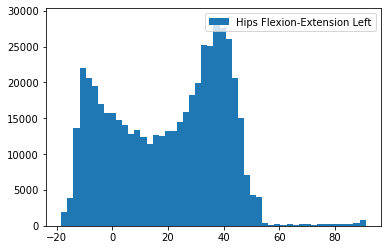

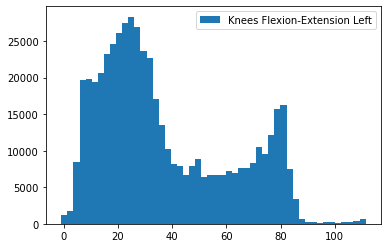

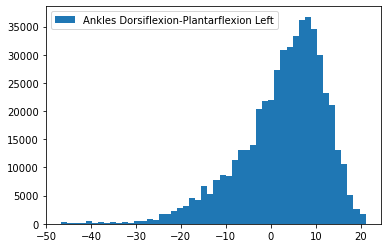

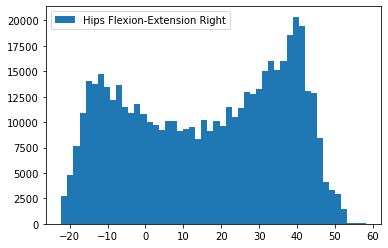

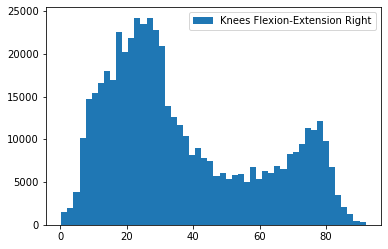

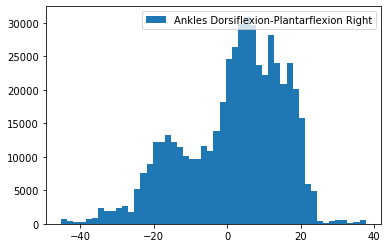

In [83]:
# Plot histogram of the data 
for f in range(len(features)):
    plt.hist(X_test_data[:,:,f].reshape(-1,1), bins=50, label = features[f])
    plt.legend()
    plt.show()

In [84]:
# Convert to Tensor 
# do not store on GPU (yet)
hModel_X_test_tensor = torch.from_numpy(hModel_X_test_norm).float()
hModel_Y_test_tensor = torch.from_numpy(hModel_Y_test_norm).float().squeeze()

print(f'hModel_X_test_tensor shape: {hModel_X_test_tensor.shape}')
print(f'hModel_Y_test_tensor shape: {hModel_Y_test_tensor.shape}')


hModel_X_test_tensor shape: torch.Size([5169, 100, 6])
hModel_Y_test_tensor shape: torch.Size([5169, 6])


In [85]:
# #only use if predicting one feature
# hModel_Y_test_tensor = hModel_Y_test_tensor[:,:,1].unsqueeze(-1)

# print(f'hModel_Y_test_tensor shape: {hModel_Y_test_tensor.shape}')

In [86]:
hModel_test_dataset = gaitDataset(hModel_X_test_tensor, hModel_Y_test_tensor)
# train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle = False)
hModel_test_dataloader = DataLoader(hModel_test_dataset, batch_size=32, shuffle = False)
# hModel_test_dataloader = DataLoader(hModel_test_dataset, batch_size=16, shuffle = False)

#### Load Healthy Model

In [106]:
H_MODEL_PATH = r'D:\Study 2 Results and Models\Study 2 Model Checkpoints' +  '\\' + 'Exp095-2022-07-28-LSTM-In100-Out1' + '.pt'

In [107]:
#set parameters of the model 
input_size=len(features)
hidden_size=10
num_layers=3
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)
learning_rate= 0.001


hModel = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
# hModel = MLP(input_size=input_size, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
optimiser = torch.optim.Adam(hModel.parameters(), lr = learning_rate)

checkpoint = torch.load(H_MODEL_PATH)
hModel.load_state_dict(checkpoint['model_state_dict'])
optimiser.load_state_dict(checkpoint['optimiser_state_dict'])
best_epoch_hModel = checkpoint['epoch']
best_val_loss_hModel = checkpoint['loss']

hModel.eval()

LSTM(
  (lstm): LSTM(6, 10, num_layers=3, batch_first=True, dropout=0.1)
  (fc1): Linear(in_features=10, out_features=6, bias=True)
)

In [108]:
H_MODEL_PATH

'D:\\Study 2 Results and Models\\Study 2 Model Checkpoints\\Exp095-2022-07-28-LSTM-In100-Out1.pt'

In [109]:
best_epoch_hModel

7

In [110]:
best_val_loss_hModel

0.0007924010744059089

In [111]:
hModel_preds_norm, hModel_actual_norm, hmodel_loss = test_LSTM(hModel, hModel_test_dataloader, DEVICE)
# hModel_preds_norm, hModel_actual_norm, hmodel_loss = test_MLP(hModel, hModel_test_dataloader)


# H_model_predicted_values = hModel_preds_norm.cpu().numpy()
# H_model_actual_values = hModel_actual_norm.cpu().numpy()

print(f'hmodel loss: {hmodel_loss}')
print(f'Shape of predicted values test: {hModel_preds_norm.cpu().numpy().shape}')
print(f'shape of actual values test: {hModel_actual_norm.cpu().numpy().shape}')

# hModel_preds = denormalise(hModel_preds_norm.cpu().numpy(), healthy_scalars)
hModel_preds = denormalise(np.expand_dims(predicted_values_val,1), scalars)
hModel_actual = denormalise(np.expand_dims(actual_values_val,1), scalars)

print(f'Shape of predicted values test post denormalisation: {hModel_preds.shape}')
print(f'shape of actual values test post denormalisation: {hModel_actual.shape}')

0it [00:00, ?it/s]

hmodel loss: 0.0012836401014125985
Shape of predicted values test: (5169, 6)
shape of actual values test: (5169, 6)
Shape of predicted values test post denormalisation: (5169, 1, 6)
shape of actual values test post denormalisation: (5169, 1, 6)


In [112]:
hModel_mse_loss, hModel_mse_std = mse_loss(hModel_preds, hModel_actual, reduction='mean', format='np')
hModel_mae_loss, hModel_mae_std = mae_loss(hModel_preds, hModel_actual, reduction='mean', format='np')

print('Losses for Healthy trained model')
print(f'hmodel MSE Loss: {hModel_mse_loss}')
print(f'hmodel MSE std: {hModel_mse_std}')
print(f'hmodel MAE Loss: {hModel_mae_loss}')
print(f'hmodel MAE std: {hModel_mae_std}')

Losses for Healthy trained model
hmodel MSE Loss: 6.0170371646675695
hmodel MSE std: 17.843278884887695
hmodel MAE Loss: 1.757118383028632
hmodel MAE std: 1.7115991115570068


#### Original Code

In [113]:
s = 1000#sample to plot
nsteps_future = 200 #number of steps to predict in the future 

with torch.no_grad(): #do not calculate gradients for forward pass
    in_to_model = hModel_X_test_tensor[s].expand((1,-1,-1)).to(DEVICE) 
    all_preds=[] 

    for _ in range(0,nsteps_future): #loop over the steps to predict in the future
        # print(f'in_to_model: {in_to_model[:,-10:,1]}')
        future_pred = hModel(in_to_model)

        all_preds.append(future_pred.tolist())

        new_in_to_model = torch.cat((in_to_model, future_pred.unsqueeze(1)),1)
        in_to_model = new_in_to_model[:,1:,:]

all_future_preds = np.array(all_preds).reshape((nsteps_future,len(features)))

all_future_preds.shape

(200, 6)

torch.Size([100])
(200,)


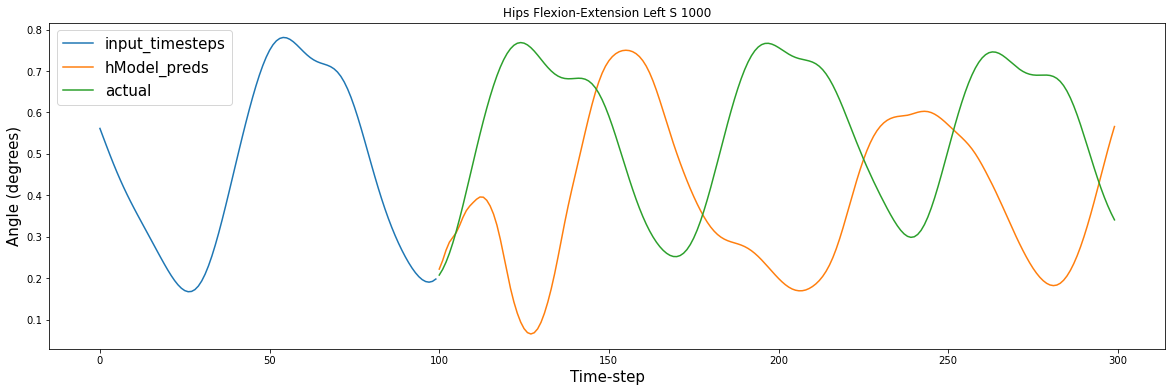

torch.Size([100])
(200,)


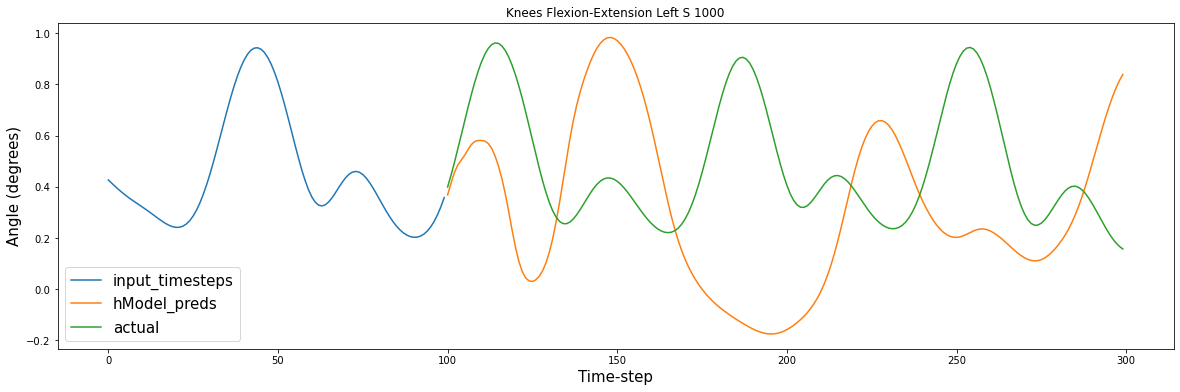

torch.Size([100])
(200,)


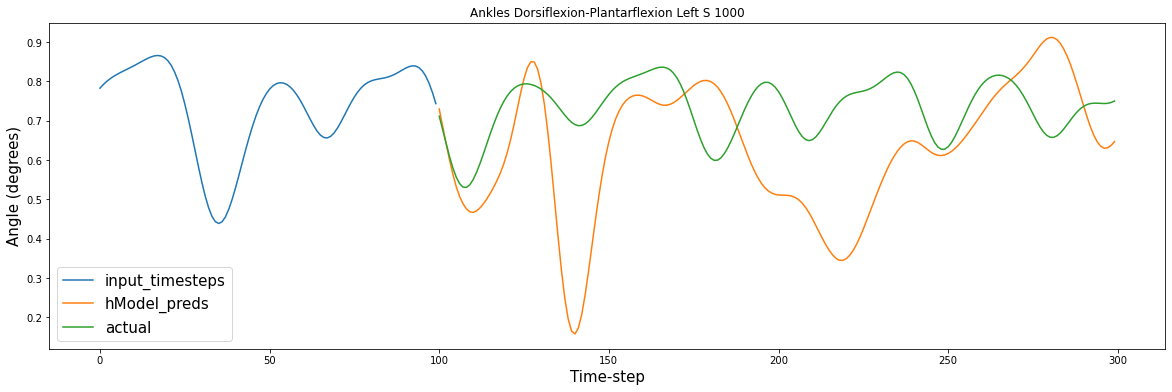

torch.Size([100])
(200,)


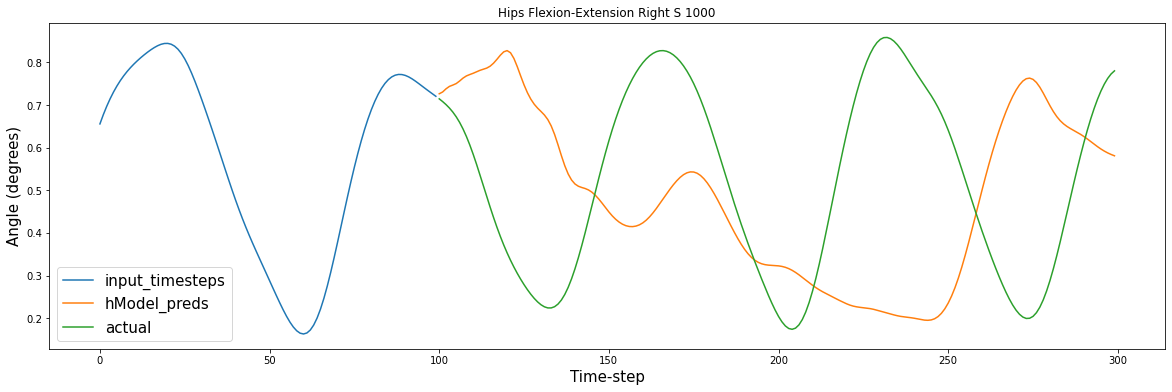

torch.Size([100])
(200,)


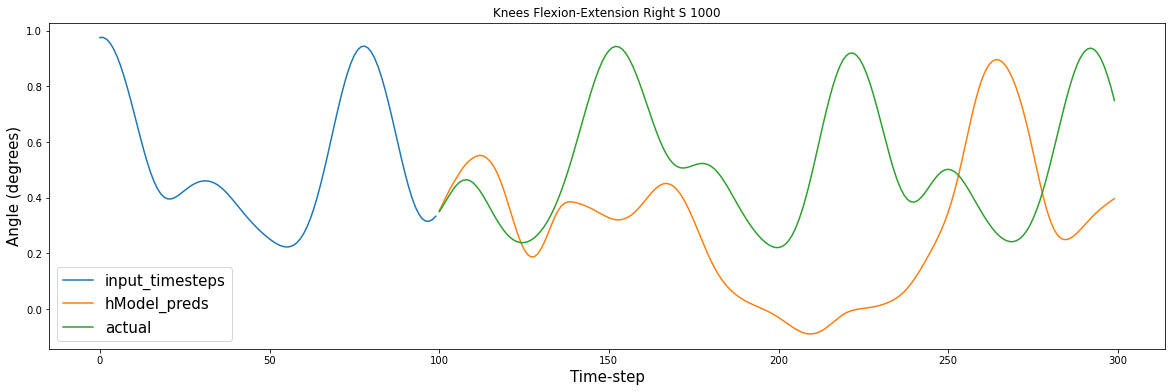

torch.Size([100])
(200,)


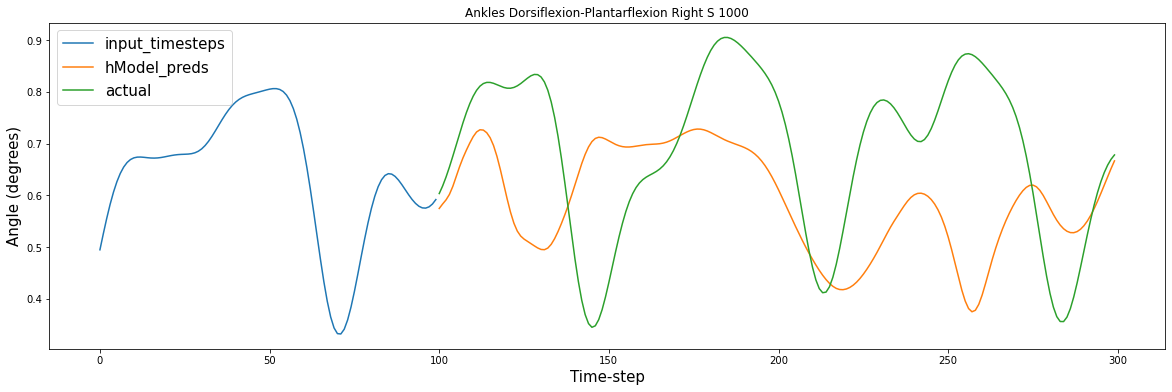

In [114]:
input_seq = hModel_X_test_tensor[s].expand((1,-1,-1))


for f in range(len(features)):
    path = r'D:\Study 2 Results and Models\Model Performance' + '\\'  + 'Exp' + str(exp_ID) + '-' + str(date.today()) + '-' + model + '-In' + str(input_window) + '-Out' + str(output_window) + '-Plot(1)-' + str(features[f]) + '.png'
   
    input = input_seq[:,:,f].squeeze()
    print(input.shape)

    predicted_trajectory = all_future_preds[:,f]
    print(predicted_trajectory.shape)

    past_timepoints = np.arange(0,len(input))
    # print(f'past_timepoints: {past_timepoints}')

    future_timepoints = np.arange(len(input), len(input)+len(predicted_trajectory))
    # print(f'future_timepoints: {future_timepoints}')

    actual_seq = hModel_Y_test_tensor[s:s+nsteps_future,f].reshape(-1,1).squeeze()
    actual_timepoints = np.arange(len(input), len(input)+len(actual_seq))

    rcParams['figure.figsize'] = 20,6

    # ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:]) #only plots last 20 values of input
    ax = sns.lineplot(x=past_timepoints[:], y=input[:], label='input_timesteps')

    # ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
    ax = sns.lineplot(x=future_timepoints, y=predicted_trajectory, label='hModel_preds')

    ax = sns.lineplot(x=actual_timepoints, y = actual_seq, label='actual')
    # ax = sns.lineplot(x=future_timepoints, y=H_model_preds, label='H_model_preds')
    # ax = sns.lineplot(x=future_timepoints, y=actual, label='actual')
    # ax = sns.lineplot(x=future_timepoints, y=input_bf_processing, label='input_bf_processing')

    # ax.set(font_scale = 1)
    # sns.set(rc={'axes.facecolor':'whitegrid', 'figure.facecolor':'whitegrid'})

    fontsize = 15
    ax.set_xlabel('Time-step', fontsize =15)
    ax.set_ylabel('Angle (degrees)', fontsize =15)

    plt.legend(fontsize = 15)
    plt.title(features[f] + ' S ' + str(s))
#  
    # plt.savefig(path)
    plt.show()


In [ ]:
#original sequence size [n_samples, timesteps, featuers]

#take only one timesteps from each sample + choose one feature only [:, 1, f]

#flatten sequence and plot 

in_seq_to_plt = X_sample.cpu().numpy()

gen_seq_to_plt = generated_sequence.cpu().numpy()

in_seq_to_plt_denorm = denormalise(in_seq_to_plt, scalars)
gen_seq_to_plt_denorm = denormalise(gen_seq_to_plt, scalars)

in_seq_to_plt_denorm = in_seq_to_plt_denorm[:, :, 1]
gen_seq_to_plt_denorm = gen_seq_to_plt_denorm[:, 0, 1]

print('in_seq_to_plt_denorm')
print(in_seq_to_plt_denorm)
print('gen_seq_to_plt_denorm')
print(gen_seq_to_plt_denorm)



In [ ]:
past_timepoints=np.array()

ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:])
# ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
ax = sns.lineplot(x=future_timepoints, y=preds)
ax = sns.lineplot(x=future_timepoints, y=actual)

### Visualise Predictions

In [ ]:
val_dataset = gaitDataset(X_val, Y_val) #ADJUSTED
# val_dataloader = DataLoader(val_dataset, batch_size=len(val_dataset), shuffle=False)
val_dataloader = DataLoader(val_dataset, batch_size=32, shuffle=False)


print(f"Train Dataset length: {len(train_dataset)}")
print(f"Val Dataset length: {len(val_dataset)}")

In [ ]:
pred_val_output, actual_val_output, val_loss = test_LSTM(model_LSTM, val_dataloader, DEVICE)

predicted_values_val = pred_val_output.cpu().numpy()
actual_values_val = actual_val_output.cpu().numpy()

print(f'val loss: {val_loss}')
print(f'Shape of predicted values test: {predicted_values_val.shape}')
print(f'shape of actual values test: {actual_values_val.shape}')

predicted_val_denorm = denormalise(predicted_values_val, scalars)
actual_val_denorm = denormalise(actual_values_val, scalars)

print(f'Shape of predicted values test post denormalisation: {predicted_val_denorm.shape}')
print(f'shape of actual values test post denormalisation: {actual_val_denorm.shape}')

In [ ]:
val_mse_loss, val_mse_std = mse_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')
val_mae_loss, val_mae_std = mae_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')

print(f'Val MSE Loss: {val_mse_loss}')
print(f'Val MSE std: {val_mse_std}')
print(f'Val MAE Loss: {val_mae_loss}')
print(f'Val MAE std: {val_mae_std}')

In [ ]:
X_val[1,:,1]


In [ ]:
Y_val[1,:,1]

In [ ]:
actual_val_output[1,:,1]

In [ ]:
pred_val_output[1,:,1]

In [ ]:
# input = np.array([1,2,3,3,5,3,1,1,2])

# print(len(input))
# actual = np.array([3,4,2])
# preds = np.array([2,1,1])

# past_timepoints = np.arange(0,len(input))
# print(past_timepoints)

# future_timepoints = np.arange(len(input), len(input)+len(preds))
# print(future_timepoints)

idx = 4

input = X_val[idx,:,idx]

print(len(input))
actual = actual_val_output[idx,:,idx].cpu().numpy()
preds = pred_val_output[idx,:,idx].cpu().numpy()

past_timepoints = np.arange(0,len(input))
print(past_timepoints)

future_timepoints = np.arange(len(input), len(input)+len(preds))
print(future_timepoints)

In [ ]:
ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:])
# ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
ax = sns.lineplot(x=future_timepoints, y=preds)
ax = sns.lineplot(x=future_timepoints, y=actual)

### Test on CP data


In [ ]:
file_dir = r'D:\Study 2 Data\CP Test (sub-sample)'
cp_files = os.listdir(file_dir) 

# Changes the working directory to get the data from their location 
os.chdir(file_dir)
cwd = os.getcwd()

print(f'Current working directory is: {cwd}')
print(f"There are {len(cp_files)} files in the specified path.")

cp_files


In [ ]:
CP_data = create_dataframe(cp_files, all_features)

In [ ]:
CP_data.shape

In [ ]:
CP_samples = count_nsamples(CP_data)

In [ ]:
def pd_to_np_converter(data, n_samples, features):
    #create a numpy array that stores the data for export
    sample_ID = []
    # patients = 2
    # n_trials = 10
    # # samples = patients * n_trials
    data_store = np.zeros((n_samples, 2500, len(features)), dtype=np.float32)
    i = 0

    for p in data['Patient ID'].unique(): #loop over patients 
        for t in data['Trial'].unique(): #loop over trials starting with trials 1 to trial 9 (inclusive)
            pd_array = data[(data['Patient ID'] == p) & (data['Trial'] == t)]
            if pd_array.empty:
                continue
                # print('DataFrame is empty!')
                # print(f'Trail {t} does not exist in {p}')
            else:
                np_array = pd_array.to_numpy()
                data_store[i, :np_array.shape[0], :] = np_array[:,3:] 
                sample_ID.append(p+ ' Ts'+str(t)) 
                i +=1

    return pd_array.columns, data_store

In [ ]:
CP_columns, CP_data_np = pd_to_np_converter(CP_data, CP_samples, features)

print(f'CP_data_np.shape: {CP_data_np.shape}')


In [ ]:
# CHECKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK
# Selecting the features to be used when creating windows 
approx_seq_len = 2500 # appoximate the length of the longest sequence that can be encountered 
# samples_per_file = ((approx_seq_len - (input_window+output_window)) // stride) + 1 #number of window samples generated per file 
samples_per_file = 2000


# create a zero-filled 3D array with shape (number of samples * number of files, window size, number of features)
X_CP_windows = np.zeros((samples_per_file*CP_samples, input_window, len(features)), dtype=np.float32) #size can be reduced by decreasing train_size 
Y_CP_windows = np.zeros((samples_per_file*CP_samples, output_window, len(features)), dtype=np.float32) 


start_idx = 0 #setting start index to equal zero 
CP_sample_sum = 0
CP_excluded_samples = []
# Create training windows 

#for i in tqdm(range(train_size)): #Use for including all data including outliers 
for i in range(CP_samples): 
       
    X_values, Y_values = window_generator(
        CP_data_np[i,:,:],
        input_window=input_window, 
        output_window=output_window, 
        stride=stride, 
        features=features,
        labels=labels
        )

    end_idx = start_idx + X_values.shape[0]

    # print(f'file number [{f}] start index: {start_idx}, end index: {end_idx}, number of samples: {X_values.shape[0]}')

    X_CP_windows[start_idx:end_idx, :, :] = X_values
    Y_CP_windows[start_idx:end_idx, :, :] = Y_values

    # print(f'number of samples copied: {X_train_data_store[start_idx:end_idx, :, :].shape[0]}')

    start_idx = end_idx 
    CP_sample_sum += X_values.shape[0]

    # except Exception:
    #     exception_msg(i)
    #     train_excluded_samples.append(i)

# print(f"Completed storage of training windows samples, which contains {X_train_data_store.shape[0]} samples")
X_CP_data = X_CP_windows[:end_idx, :, :]
Y_CP_data = Y_CP_windows[:end_idx, :, :]


print(f'shape of X_CP_windows: {X_CP_windows.shape}')
print(f'shape of Y_CP_windows: {Y_CP_windows.shape}')

print(f'shape of X_CP_data: {X_CP_data.shape}')
print(f'shape of Y_CP_data: {Y_CP_data.shape}')

In [ ]:
X_CP_norm = normalise_transform(X_CP_data, scalars)
Y_CP_norm = normalise_transform(Y_CP_data, scalars)

In [ ]:

# Plot histogram of the data 
for f in range(len(features)):
    plt.hist(X_CP_norm[:,:,f].reshape(-1,1), bins=50, label = features[f])
    plt.legend()
    plt.show()

In [ ]:
# Convert to Tensor 
# do not store on GPU (yet)
X_CP_tensor = torch.from_numpy(X_CP_norm).float()
Y_CP_tensor = torch.from_numpy(Y_CP_norm).float()

print(f'X_CP_tensor shape: {X_CP_tensor.shape}')
print(f'Y_CP_tensor shape: {Y_CP_tensor.shape}')


In [ ]:
CP_dataset = gaitDataset(X_CP_tensor, Y_CP_tensor)
# train_dataloader = DataLoader(train_dataset, batch_size=len(train_dataset), shuffle = False)
CP_dataloader = DataLoader(CP_dataset, batch_size=32, shuffle = False)

In [ ]:
pred_CP_output, actual_CP_output, CP_loss = test_LSTM(checkpoint_model, CP_dataloader, DEVICE)

predicted_values_CP = pred_CP_output.cpu().numpy()
actual_values_CP = actual_CP_output.cpu().numpy()

print(f'CP loss: {CP_loss}')
print(f'Shape of predicted values test: {predicted_values_CP.shape}')
print(f'shape of actual values test: {actual_values_CP.shape}')

predicted_CP_denorm = denormalise(predicted_values_CP, scalars)
actual_CP_denorm = denormalise(actual_values_CP, scalars)

print(f'Shape of predicted values test post denormalisation: {predicted_CP_denorm.shape}')
print(f'shape of actual values test post denormalisation: {actual_CP_denorm.shape}')

In [ ]:
CP_mse_loss, CP_mse_std = mse_loss(predicted_CP_denorm, actual_CP_denorm, reduction='mean', format='np')
CP_mae_loss, CP_mae_std = mae_loss(predicted_CP_denorm, actual_CP_denorm, reduction='mean', format='np')

print(f'CP MSE Loss: {CP_mse_loss}')
print(f'CP MSE std: {CP_mse_std}')
print(f'CP MAE Loss: {CP_mae_loss}')
print(f'CP MAE std: {CP_mae_std}')

In [ ]:
#code for generating sequences based on an input

def test_LSTM_single_step(model, input_seq, n_future_steps, device):
    # loss_function = nn.MSELoss(reduction='mean')
    model.eval()
    # actual_output, pred_output = [], []
    # running_loss = 0. 

    gen_seq = [] #generated sequence 
    new_seq = torch.empty(input_seq.shape)
    input_seq = input_seq.to(device)

    with torch.no_grad():
        for i in range(n_future_steps):
        
            # print(f'input_seq shape: {input_seq.shape}')

            preds = model(input_seq)
            # print(f'preds.shape: {preds.shape}')
            
            gen_seq.append(preds)
            # print(f'input_seq[:,preds.shape[1]:,:].shape: {input_seq[:,preds.shape[1]:,:].shape}')

            new_seq=torch.cat((input_seq[:,preds.shape[1]:,:], preds), axis=1)

            # print(f'new_seq.shape: {new_seq.shape}')
            input_seq=new_seq

        gen_seq_tensor = torch.vstack(gen_seq)
    # print(f'gen_seq_tensor.shape: {gen_seq_tensor.shape}')
    
    return gen_seq_tensor


        



    # inputs = []
    # outputs = []

    # model(inputs)

    #     for idx, (batch_inputs, batch_targets) in tqdm(enumerate(dataloader)):

    #         batch_inputs, batch_targets = batch_inputs.to(device), batch_targets.to(device)

    #         # if idx==0:
    #         #     batch_preds = model(batch_inputs)
    #         #     # print(f'batch shape: {batch_preds.shape}')
    #         #     loss = loss_function(batch_preds, batch_targets)
    #         #     running_loss += loss.item()
    #         #     current_preds = batch_preds
    #         #     all_preds = batch_preds

    #         # else:
    #         #     batch_preds = model(batch_inputs)
    #         #     print(f'batch shape: {batch_preds.shape}')
    #         #     loss = loss_function(batch_preds, batch_targets)
    #         #     running_loss += loss.item()
    #         #     all_preds = torch.cat((current_preds, batch_preds), dim=0)
    #         #     current_preds = batch_preds

    #         batch_preds = model(batch_inputs)
    #         loss = loss_function(batch_preds, batch_targets)
    #         running_loss += loss.item()
    #         actual_output.append(batch_targets)
    #         pred_output.append(batch_preds)


    #         #             lst = []
    #         # print(f'{x.size()}')
    #         # for i in range(10):
    #         #     x += i  # say we do something with x at iteration i
    #         #     lst.append(x)
    #         # # lstt = torch.stack([x for _ in range(10)])
    #         # lstt = torch.stack(lst)
    #         # print(lstt.size())

    #     total_loss = running_loss / len(dataloader)

    #     actual_output_tensor = torch.vstack(actual_output)
    #     pred_output_tensor = torch.vstack(pred_output)
    
    # return pred_output_tensor, actual_output_tensor, total_loss

In [ ]:
X_sample, Y_sample = [ x[0] for x in iter(CP_dataloader).next() ]

X_sample = X_sample.unsqueeze(0)

X_sample.shape

In [ ]:
X_sample.shape

Y_sample.shape

In [ ]:
generated_sequence = test_LSTM_single_step(model_LSTM, X_sample,20, DEVICE)



### Connect sequences to plot  

In [ ]:
#original sequence size [n_samples, timesteps, featuers]

#take only one timesteps from each sample + choose one feature only [:, 1, f]

#flatten sequence and plot 

in_seq_to_plt = X_sample.cpu().numpy()

gen_seq_to_plt = generated_sequence.cpu().numpy()

in_seq_to_plt_denorm = denormalise(in_seq_to_plt, scalars)
gen_seq_to_plt_denorm = denormalise(gen_seq_to_plt, scalars)

in_seq_to_plt_denorm = in_seq_to_plt_denorm[:, :, 1]
gen_seq_to_plt_denorm = gen_seq_to_plt_denorm[:, 0, 1]

print('in_seq_to_plt_denorm')
print(in_seq_to_plt_denorm)
print('gen_seq_to_plt_denorm')
print(gen_seq_to_plt_denorm)



In [ ]:
past_timepoints=np.array()

ax = sns.lineplot(x=past_timepoints[-20:], y=input[-20:])
# ax.fill_between(x=past_timepoints, y1=input_stats, y2=input_stats, alpha=0.1)
ax = sns.lineplot(x=future_timepoints, y=preds)
ax = sns.lineplot(x=future_timepoints, y=actual)

### Benchmark

#### Benchmark against naive method 

In [ ]:
## benchmark against naive output (making prediction only last value)
naive_1_train_output = np.zeros(Y_train_data.shape)

for f in range(len(features)):
    for s in range(Y_train_data.shape[0]):
        naive_1_train_output[s,:,f] = np.ones((output_window)) * X_train_data[s,-1,f]



# print(naive_1_test_output.shape)


# naive_1_test_output[1,:,1]

# X_test_data[1,:,1]



In [ ]:
naive_1_mse_loss, naive_1_mse_std = mse_loss(naive_1_train_output, Y_train_data, reduction='mean', format='np')
naive_1_mae_loss, naive_1_mae_std = mae_loss(naive_1_train_output, Y_train_data, reduction='mean', format='np')

print(f'naive_1 MSE Loss: {naive_1_mse_loss}')
print(f'naive_1 MSE std: {naive_1_mse_std} ')
print(f'naive_1 MAE Loss: {naive_1_mae_loss}')
print(f'naive_1 MAE std: {naive_1_mae_std}')

In [ ]:
## benchmark against mean output

naive_average_train_output = np.zeros(Y_train_data.shape)

for f in range(len(features)):
    for s in range(Y_train_data.shape[0]):
        naive_average_train_output[s,:,f] = np.ones((output_window)) * np.mean(X_train_data[s,:,f])



print(naive_average_train_output.shape)



In [ ]:
naive_average_mse_loss, naive_average_mse_std = mse_loss(naive_average_train_output, Y_train_data, reduction='mean', format='np')
naive_average_mae_loss, naive_average_mae_std = mae_loss(naive_average_train_output, Y_train_data, reduction='mean', format='np')

print(f'average MSE Loss: {naive_average_mse_loss}')
print(f'average MSE std: {naive_average_mse_std} ')
print(f'average MAE Loss: {naive_average_mae_loss}')
print(f'average MAE std: {naive_average_mae_std}')

### Save Progress and Results

In [ ]:
out_fname = r'D:\Study 2 Results and Models\Investigation Results' + '\\' + 'Study 2 Experimentation Results' + '.txt'

In [ ]:
# if os.path.exists(out_fname):
#     print('ERROR: File with this name already exists, try alternative name.')
    
# else:
with open(out_fname, 'a+') as text_file:
    
    print('Experiment Report', file=text_file)
    print(f'{exp_ID}: {date.today()}',file=text_file)
    # print('\n', file=text_file)
    print(f'model: {model}', file=text_file)
    print(f'features: {features} \n', file=text_file)

    print('Information on Data', file=text_file)
    print(f'train size: {train_sample_sum}', file=text_file)
    print(f'validation size: {val_sample_sum}', file=text_file)
    print(f'Train subjects: {train_subjects}', file=text_file)
    print(f'Val subjects: {val_subjects}', file=text_file)
    print(f'Scalars: {scalars} \n', file=text_file)

    print('Model Hyperparameters', file=text_file)
    print(f'input window size: {input_window}', file=text_file)
    print(f'output window size: {output_window}', file=text_file)
    print(f'stride: {stride}', file=text_file)
    print(f'epochs: {num_epochs}', file=text_file)
    print(f'hidden size: {hidden_size}', file=text_file)
    print(f'number of layers: {num_layers}', file=text_file)
    print(f'learning rate: {learning_rate}', file=text_file)
    print(f'optimiser: MSE', file=text_file)

    print(f'best_epoch: {best_epoch}', file=text_file)
    print(f'best_val_loss: {best_val_loss}', file=text_file)

    print('\n', file = text_file)
    print(f'Model Architecture', file=text_file)
    print(model_LSTM, file=text_file)

    print(f'Losses during training:', file=text_file)
    print(f'training loss: {train_history}', file=text_file)
    print(f'validation history: {val_history}', file=text_file)

    print('\n', file=text_file)
    print(f'Denomralised MSE and MAE: ', file=text_file)
    print(f'Validation MSE and std(degrees): {val_mse_loss:.3f}, {val_mse_std:.3f}', file=text_file)
    print(f'Validation MAE and std (degrees): {val_mae_loss:.3f}, {val_mae_std:.3f}', file=text_file)
    # print('\n', file=text_file)
    print('--------------------------------------------------------------------------------------------------------', file=text_file)


print("Generation of text file complete.")

In [ ]:
plt_path = r'D:\Study 2 Results and Models\Investigations Plots' + '\\'  + 'Exp' + str(exp_ID) + '-' + str(date.today()) + '-' + model + '-In' + str(input_window) + '-Out' + str(output_window) + '(loss)' + '.png'
fst_e = 10 #first epoch to start plotting for 
x = [i for i in range(fst_e,num_epochs)]
# print(x)
# print(train_history[20:145].shape)
plt.plot(x,train_history[fst_e:], label = 'Training loss')
plt.plot(x,val_history[fst_e:], label = 'Val loss')
# plt.plot(train_history, label = 'Training loss')
# plt.plot(val_history, label = 'Val loss')


plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Train and Val MSE Loss')
plt.legend()
plt.savefig(plt_path)

In [ ]:
import_path = r'D:\Study 1 Results and Models\Study 1 Models\LSTM_4' + '\\' + 'Exp014-2022-02-10-LSTM-In120-Out3.pickle'
# # # import_path = r'C:\Users\Rania\rbk9\Study 1 Results and Models\Study 1 Models\CNN_1' + '\\' + 'Exp001-2022-01-24-CNN-In96-Out1.pickle'
# # # model_CNN = CNN(input_size, output_size=output_size, kernel_size=kernel_size, stride=1, in_seq_len=in_seq_len, out_seq_len=out_seq_len,  device = DEVICE).to(DEVICE)

input_size=len(features)
hidden_size=128
num_layers=4
in_seq_len=input_window
out_seq_len=output_window
output_size=len(features)
# num_epochs=60

# # learning_rate= 0.001

model_LSTM = LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, in_seq_len=in_seq_len, out_seq_len=out_seq_len, output_size=output_size, device=DEVICE).to(DEVICE)
model_LSTM.load_state_dict(torch.load(import_path))
model_LSTM.eval()

In [ ]:
pred_val_output, actual_val_output, val_loss = test_LSTM(model_LSTM, val_dataloader, DEVICE)

predicted_values_val = pred_val_output.cpu().numpy()
actual_values_val = actual_val_output.cpu().numpy()

print(f'val loss: {val_loss}')
print(f'Shape of predicted values test: {predicted_values_val.shape}')
print(f'shape of actual values test: {actual_values_val.shape}')

predicted_val_denorm = denormalise(predicted_values_val, scalars)
actual_val_denorm = denormalise(actual_values_val, scalars)

print(f'Shape of predicted values test post denormalisation: {predicted_val_denorm.shape}')
print(f'shape of actual values test post denormalisation: {actual_val_denorm.shape}')

In [ ]:
val_mse_loss, val_mse_std = mse_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')
val_mae_loss, val_mae_std = mae_loss(predicted_val_denorm, actual_val_denorm, reduction='mean', format='np')

print(f'Val MSE Loss: {val_mse_loss}')
print(f'Val MSE std: {val_mse_std}')
print(f'Val MAE Loss: {val_mae_loss}')
print(f'Val MAE std: {val_mae_std}')

In [ ]:
# for p in model_LSTM.parameters():
#     print(p.device)

In [ ]:
# # Testing function 
# def test_LSTM(model, dataloader):
#     loss_function = nn.MSELoss(reduction='mean')
#     model.eval()
#     actual_output, pred_output = [], []
#     running_loss = 0. 
    
#     with torch.no_grad():
#         for idx, (batch_inputs, batch_targets) in tqdm(enumerate(dataloader)):

#             batch_inputs, batch_targets = batch_inputs.to(DEVICE), batch_targets.to(DEVICE)

#             # if idx==0:
#             #     batch_preds = model(batch_inputs)
#             #     # print(f'batch shape: {batch_preds.shape}')
#             #     loss = loss_function(batch_preds, batch_targets)
#             #     running_loss += loss.item()
#             #     current_preds = batch_preds
#             #     all_preds = batch_preds

#             # else:
#             #     batch_preds = model(batch_inputs)
#             #     print(f'batch shape: {batch_preds.shape}')
#             #     loss = loss_function(batch_preds, batch_targets)
#             #     running_loss += loss.item()
#             #     all_preds = torch.cat((current_preds, batch_preds), dim=0)
#             #     current_preds = batch_preds

#             batch_preds = model(batch_inputs)
#             # print(f'batch preds: {batch_preds.type}')
#             loss = loss_function(batch_preds, batch_targets)
#             running_loss += loss.item()
#             actual_output.append(batch_targets)
#             pred_output.append(batch_preds)


#             #             lst = []
#             # print(f'{x.size()}')
#             # for i in range(10):
#             #     x += i  # say we do something with x at iteration i
#             #     lst.append(x)
#             # # lstt = torch.stack([x for _ in range(10)])
#             # lstt = torch.stack(lst)
#             # print(lstt.size())

#         total_loss = running_loss / len(dataloader)

#         actual_output_tensor = torch.vstack(actual_output)
#         pred_output_tensor = torch.vstack(pred_output)
    
#     return pred_output_tensor, actual_output_tensor, total_loss

In [ ]:
# # Creates dataset object that gets individual samples for training/testing so that the Dataloader can generate batches
# class gaitDataset(Dataset):
#     def __init__(self, x, y):
#         self.x = x 
#         self.y = y 

#     def __len__(self):
#         return self.x.shape[0]
    
#     def __getitem__(self, index):
#         X_sample = self.x[index, :, :]
#         Y_sample = self.y[index, :, :]
#         return X_sample, Y_sample

In [ ]:
# # X_test_norm = normalise_transform(X_test_data, scalars)
# # Y_test_norm = normalise_transform(Y_test_data, scalars)

# # Convert to Tensor 
# # do not store on GPU (yet)
# X_test = torch.from_numpy(X_train_norm).float()
# Y_test = torch.from_numpy(Y_train_norm).float()

# print(f'X_test shape: {X_test.shape}')
# print(f'Y_test shape: {Y_test.shape}')

In [ ]:
# test_dataset = gaitDataset(X_test, Y_test)
# # # test_dataloader = DataLoader(test_dataset, batch_size=len(test_dataset), shuffle=False)
# test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False) #ADJUSTED

# print(f"Test Dataset length: {len(test_dataset)}")

In [ ]:
# pred_test_output, actual_test_output, test_loss = test_LSTM(model_LSTM, test_dataloader)

# predicted_values_test = pred_test_output.cpu().numpy() # premute again to make the order of the array (samples, windows, features)
# actual_values_test =  actual_test_output.cpu().numpy()

# print(f'test loss: {test_loss}')

# print(f'Shape of predicted values test: {predicted_values_test.shape}')
# print(f'shape of actual values test: {actual_values_test.shape}')

# predicted_test_denorm = denormalise(predicted_values_test, scalars)
# actual_test_denorm =  denormalise(actual_values_test, scalars)

# print(f'Shape of predicted values test post denormalisation: {predicted_test_denorm.shape}')
# print(f'shape of actual values test post denormalisation: {actual_test_denorm.shape}')

In [ ]:
test_mse_loss, test_mse_std = mse_loss(predicted_test_denorm, actual_test_denorm, reduction='mean', format='np')
test_mae_loss, test_mae_std = mae_loss(predicted_test_denorm, actual_test_denorm, reduction='mean', format='np')

print(f'Test MSE Loss: {test_mse_loss}')
print(f'Test MSE std: {test_mse_std} ')

# MDE= mae_loss(actual_test_denorm[:-1,:,:],actual_test_denorm[1:,:,:],reduction='mean', format='np')
MDE= mae_loss(actual_test_denorm[:,:,:],actual_test_denorm[:,:,:],reduction='mean', format='np')

print(f'Test MAE Loss: {test_mae_loss}')
print(f'Test MAE std: {test_mae_std}')

In [ ]:
plt.hist(np.abs(predicted_test_denorm[:,:,1].reshape(-1,1) - actual_test_denorm[:,:,1].reshape(-1,1)))



In [ ]:
actual = np.array([23,36,28,33,44,22,12,10,1])
predicted = np.array([23, 35.5, 28.1, 33, 45, 15, 13, 8, 0])

actual-predicted

In [ ]:
abs_values = np.abs(actual-predicted)

plt.hist(abs_values)

In [ ]:


np.abs(actual-predicted).std()
